# Black Oil PVT: Oil FVF Models

## Importing the required libraries

In [3]:
import pandas as pd
import missingno as mno
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

# Incluidng training datatset

In [252]:
df = pd.read_excel(######\ML models with cmg\Goldie1BHS_test_data_model\Training_data_Bo_with_P_goldie1_test.xlsx")

# Data pre-processing

In [253]:
df.dropna(inplace = True)

In [254]:
df

,P_psia,Rs_SCF/STB,Oil_FVF,Oil_dens_g/cc,Deviation factor Z,Temp_F,gas_spgr,oil_des_60,API_60
0,13015.0,440.0,1.247,0.7580,0.000,251.6,0.000,0.821420,40.762751
1,10990.0,440.0,1.261,0.7500,0.000,251.6,0.000,0.813420,42.456959
2,8999.0,440.0,1.278,0.7400,0.000,251.6,0.000,0.803420,44.622166
3,6994.0,440.0,1.299,0.7280,0.000,251.6,0.000,0.791420,47.292640
4,5999.0,440.0,1.311,0.7210,0.000,251.6,0.000,0.784420,48.888149
...,...,...,...,...,...,...,...,...,...
277,900.0,334.0,1.255,0.7364,0.903,186.8,0.826,0.778371,50.289964
278,500.0,230.0,1.208,0.7482,0.942,186.8,0.900,0.790171,47.575208
279,200.0,137.0,1.161,0.7598,0.975,186.8,1.063,0.801771,44.984352
280,90.0,93.0,1.135,0.7663,0.988,186.8,1.261,0.808271,43.565090


In [255]:
df.describe()

,P_psia,Rs_SCF/STB,Oil_FVF,Oil_dens_g/cc,Deviation factor Z,Temp_F,gas_spgr,oil_des_60,API_60
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,1566.119662,380.886096,1.255134,0.743413,0.716408,168.801277,0.654748,0.779426,50.994381
std,1615.289414,313.571417,0.166813,0.065593,0.384306,42.404965,0.441240,0.057816,12.951510
min,0.000000,0.000000,1.013200,0.614800,0.000000,100.000000,0.000000,0.647900,14.596186
25%,462.500000,154.150000,1.120250,0.698250,0.818000,131.000000,0.566250,0.742741,43.777490
50%,1200.000000,327.000000,1.239000,0.737000,0.896000,170.000000,0.688500,0.777138,50.578227
75%,2200.000000,506.500000,1.346000,0.777150,0.953750,186.800000,0.815750,0.807291,59.010698
max,13015.000000,1422.000000,1.837000,0.955300,1.020000,257.000000,2.780000,0.968540,86.897901


# Correlation coefficients for feature selection: Pearson for linear correlation

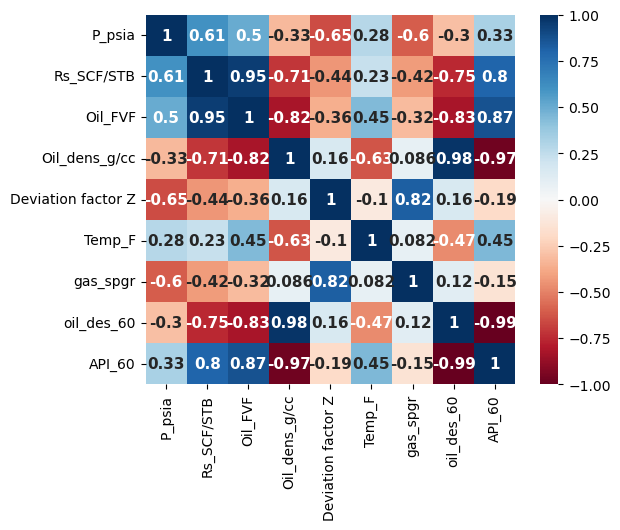

In [256]:
corr = df.corr(method = 'pearson')

#plt.figure(figsize = (15,15))
plt.figure()
h_map = sns.heatmap(corr, cmap = 'RdBu', vmin = -1, vmax = 1, annot = True, square = True,
            annot_kws = {'fontsize': 11, 'fontweight':'bold'})

# Correlation coefficients for feature selection: Spearman for non-linear correlation

<Figure size 1600x1600 with 0 Axes>

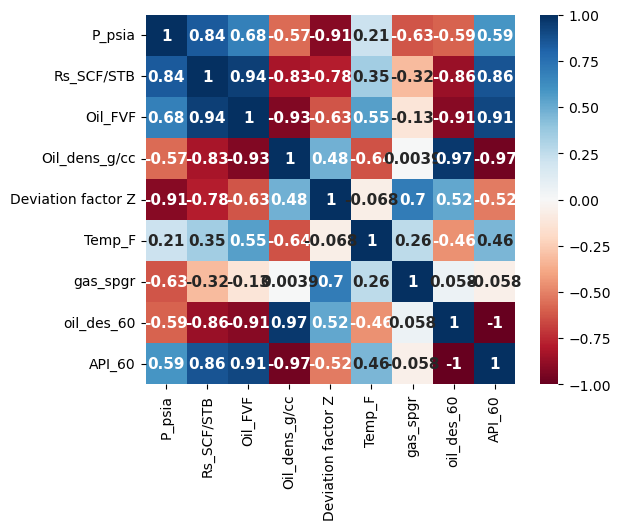

In [411]:
corr = df.corr(method = "spearman")

plt.figure(figsize = (16,16))
plt.figure()
h_map = sns.heatmap(corr, cmap = 'RdBu', vmin = -1, vmax = 1, annot = True, square = True,
            annot_kws = {'fontsize': 11, 'fontweight':'bold'})

In [260]:
df.columns

Index(['P_psia', 'Rs_SCF/STB', 'Oil_FVF', 'Oil_dens_g/cc',
       'Deviation factor Z', 'Temp_F', 'gas_spgr', 'oil_des_60', 'API_60'],
      dtype='object')

# Train parameter and target selection

In [ ]:
X = df[['Rs_SCF/STB', 'oil_des_60', 'gas_spgr', 'Temp_F']]
y = df['Oil_FVF']

In [262]:
X

,Rs_SCF/STB,oil_des_60,gas_spgr,Temp_F
0,440.0,0.821420,0.000,251.6
1,440.0,0.813420,0.000,251.6
2,440.0,0.803420,0.000,251.6
3,440.0,0.791420,0.000,251.6
4,440.0,0.784420,0.000,251.6
...,...,...,...,...
277,334.0,0.778371,0.826,186.8
278,230.0,0.790171,0.900,186.8
279,137.0,0.801771,1.063,186.8
280,93.0,0.808271,1.261,186.8


In [263]:
y

0      1.247
1      1.261
2      1.278
3      1.299
4      1.311
       ...  
277    1.255
278    1.208
279    1.161
280    1.135
281    1.062
Name: Oil_FVF, Length: 282, dtype: float64

# Train-Test split

In [264]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

# Model 1 Linear regression

In [265]:
regl = LinearRegression()
regl.fit(X_train, y_train)

LinearRegression()

In [266]:
y_pred = regl.predict(X_val)

In [267]:
r2_linear = metrics.r2_score(y_val,y_pred)  # random forest regression
r2_linear

0.9502385641973082

(1.0, 1.8)

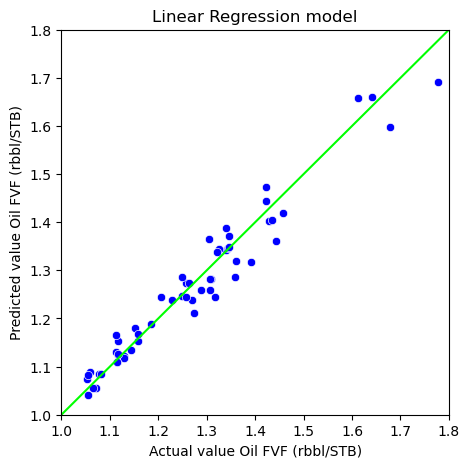

In [268]:
plt.figure(figsize=(5,5))
sns.scatterplot(x = y_val,y = y_pred, color ="blue")
plt.plot((0,1.8),(0,1.8), c= 'lime')
#plt.figsize(10,10)
plt.title('Linear Regression model')
plt.xlabel('Actual value Oil FVF (rbbl/STB)')
plt.ylabel('Predicted value Oil FVF (rbbl/STB)')
plt.xlim(1,1.8)
plt.ylim(1,1.8)


# Model 2 Random Forest Regressor 

In [269]:
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [270]:
y_pred2 = reg_rf.predict(X_val)

In [271]:
r2_forest = metrics.r2_score(y_val,y_pred2)  # random forest regression
r2_forest

0.975938997752017

(1.0, 1.8)

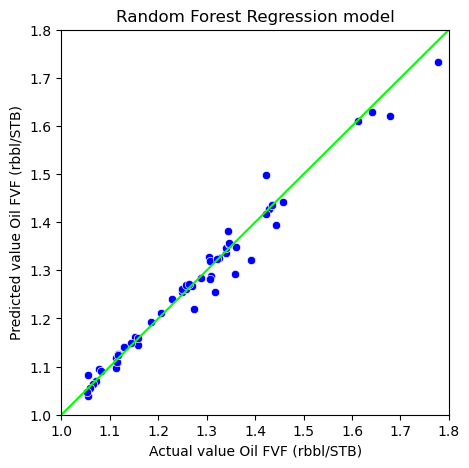

In [272]:
plt.figure(figsize=(5,5))
sns.scatterplot(x= y_val,y = y_pred2, color ="blue")
plt.plot((0,1.8),(0,1.8), c= 'lime')
#plt.figsize(10,10)
plt.title('Random Forest Regression model')
plt.xlabel('Actual value Oil FVF (rbbl/STB)')
plt.ylabel('Predicted value Oil FVF (rbbl/STB)')
plt.xlim(1,1.8)
plt.ylim(1,1.8)

# Model 3 AdaBoost Regression

In [273]:
reg_ada = AdaBoostRegressor()
reg_ada.fit(X_train, y_train)

AdaBoostRegressor()

In [274]:
y_pred3 = reg_ada.predict(X_val)
r2_ada = metrics.r2_score(y_val,y_pred3)  #AdaBoost regression
r2_ada

0.9460587392796045

(1.0, 1.8)

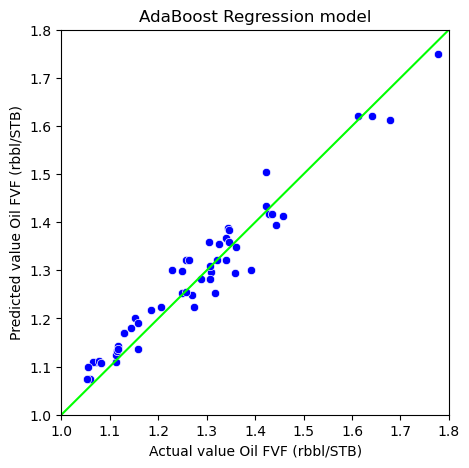

In [275]:
plt.figure(figsize=(5,5))
sns.scatterplot(x = y_val,y = y_pred3, color ="blue")
plt.plot((0,1.8),(0,1.8), c= 'lime')
#plt.figsize(10,10)
plt.title('AdaBoost Regression model')
plt.xlabel('Actual value Oil FVF (rbbl/STB)')
plt.ylabel('Predicted value Oil FVF (rbbl/STB)')
plt.xlim(1,1.8)
plt.ylim(1,1.8)

# Model 4 Gradient Boosting regressor

In [276]:
reg_gb = GradientBoostingRegressor()
reg_gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [277]:
y_pred4 = reg_gb.predict(X_val)
r2_gb = metrics.r2_score(y_val,y_pred4)  # Gradient Boosting regressor
r2_gb

0.9859324495312397

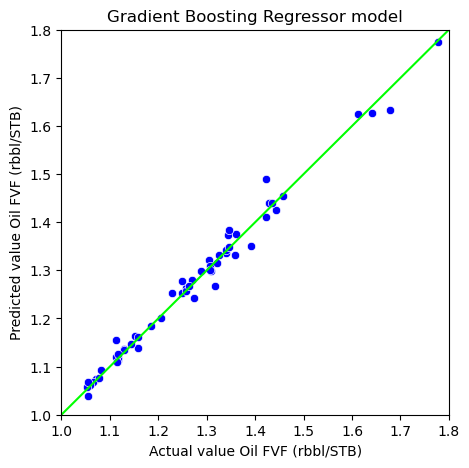

In [409]:
plt.figure(figsize=(5,5))
sns.scatterplot(x= y_val,y = y_pred4, color ="blue")
plt.plot((0,1.8),(0,1.8), c= 'lime')
#plt.figsize(10,10)
plt.title('Gradient Boosting Regressor model')
plt.xlabel('Actual value Oil FVF (rbbl/STB)')
plt.ylabel('Predicted value Oil FVF (rbbl/STB)')
plt.xlim(1,1.8)
plt.ylim(1,1.8)

plt.savefig('actual vs pred gb oil fvf.png', dpi = 1200,  bbox_inches='tight')
plt.show()

# additional model XGBoost Regressor

In [279]:
reg_xgb = xgb.XGBRegressor(objective ='reg:linear')
# 
reg_xgb.fit(X_train, y_train)

[14:04:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [280]:
y_pred5 = reg_xgb.predict(X_val)
r2_xgb = metrics.r2_score(y_val,y_pred5)  # Gradient Boosting regressor
r2_xgb

0.9873866096921785

# Hyperparameter optimization

In [496]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]

# Number of features to consider at every split
# max_features = ['auto', 'sqrt','log2']
max_features = ['auto']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,5)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 8,10,14]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8,10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'random_state':[None,42],
    'max_leaf_nodes':[None,2,10,20,30],
    'criterion':["squared_error", "absolute_error", "poisson"]}

print(random_grid)

{'n_estimators': [200, 650, 1100, 1550, 2000], 'max_features': ['auto'], 'max_depth': [10, 257, 505, 752, 1000], 'min_samples_split': [2, 5, 8, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8, 10], 'random_state': [None, 42], 'max_leaf_nodes': [None, 2, 10, 20, 30], 'criterion': ['squared_error', 'absolute_error', 'poisson']}


In [475]:
from sklearn.model_selection import GridSearchCV

LR_rf = {'n_estimators':[100,200,300],
    'criterion':["squared_error", "absolute_error"],
    'max_depth':[3],
    'min_samples_split':[2,3,5],
    'min_samples_leaf':[1,2,3],
    'min_weight_fraction_leaf':[0.0],
    'max_features':["auto", "sqrt"],
    'max_leaf_nodes':[None,2,10],
    'min_impurity_decrease':[0.0],
    'bootstrap':[True],
    'oob_score':[False],
    'n_jobs':[-1],
    'random_state':[42],
    'verbose':[1],
    'warm_start':[False],
    'ccp_alpha':[0.0],
    'max_samples':[None]}
tuning = GridSearchCV(estimator = RandomForestRegressor(), param_grid = LR_rf, scoring = "r2", n_jobs = -1, 
                      verbose = 1, cv = 2)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_


Fitting 2 folds for each of 324 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    2.5s finished


({'bootstrap': True,
  'ccp_alpha': 0.0,
  'criterion': 'squared_error',
  'max_depth': 3,
  'max_features': 'sqrt',
  'max_leaf_nodes': None,
  'max_samples': None,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'n_estimators': 300,
  'n_jobs': -1,
  'oob_score': False,
  'random_state': 42,
  'verbose': 1,
  'warm_start': False},
 0.9158980867861273)

# Model evaluation on Validation data or Test data split

In [386]:
me_lin1 = metrics.max_error(y_val, y_pred)  # linnear regression
print("MaxEr_lin: ", round(me_lin1,2))
me_rf1 = metrics.max_error(y_val, y_pred2)  # random forest regressor
print("MaxEr_rf: ", round(me_rf1,2))
me_ada1 = metrics.max_error(y_val, y_pred3)  # Ada Boost regression
print("MaxEr_ada: ", round(me_ada1,2))
me_gb1 = metrics.max_error(y_val, y_pred4)  # Gradient boost
print("MaxEr_gb: ", round(me_gb1,2))
########################################################
mae_lin1 = metrics.mean_absolute_error(y_val, y_pred)  # linnear regression
print("MAE_lin: ", round(mae_lin1,2))
mae_rf1 = metrics.mean_absolute_error(y_val, y_pred2)  # random forest regressor
print("MAE_rf: ", round(mae_rf1,2))
mae_ada1 = metrics.mean_absolute_error(y_val, y_pred3)  # Ada Boost regression
print("MAE_ada: ", round(mae_ada1,2))
mae_gb1 = metrics.mean_absolute_error(y_val, y_pred4)  # Gradient boost
print("MAE_gb: ", round(mae_gb1,2))
#########################################################
mse_lin1 = metrics.mean_squared_error(y_val, y_pred)  # linnear regression
print("MSE_lin: ", round(mse_lin1,2))
mse_rf1 = metrics.mean_squared_error(y_val, y_pred2)  # random forest regressor
print("MSE_rf: ", round(mse_rf1,2))
mse_ada1 = metrics.mean_squared_error(y_val, y_pred3)  # Ada Boost regression
print("MSE_ada: ", round(mse_ada1,2))
mse_gb1 = metrics.mean_squared_error(y_val, y_pred4)  # Gradient boost
print("MSE_gb: ", round(mse_gb1,2))
########################################################
rmse_lin1 = mse_lin1**(1/2)
print("RMSE_lin: ", round(rmse_lin1,2))
rmse_rf1 = mse_rf1**(1/2)
print("RMSE_rf: ", round(rmse_rf1,2))
rmse_ada1 = mse_ada1**(1/2)
print("RMSE_ada: ", round(rmse_ada1,2))
rmse_gb1 = mse_gb1**(1/2)
print("RMSE_gb: ", round(rmse_gb1,2))
#######################################################
mape_lin1 = metrics.mean_absolute_percentage_error(y_val, y_pred) # linear regression
print("MAPE Linear Regression: ",round(mape_lin1,2))
mape_rf1 = metrics.mean_absolute_percentage_error(y_val, y_pred2) # random forest regressor
print("MAPE Random forest regressor: ",round(mape_rf1,2))
mape_ada1 = metrics.mean_absolute_percentage_error(y_val, y_pred3) # ada boost regressor
print("MAPE Ada Boost Regressor: ",round(mape_ada1,2))
mape_gb1 = metrics.mean_absolute_percentage_error(y_val, y_pred4) # Gradient boost regressor
print("MAPE Gradient Boost Regressor: ",round(mape_gb1,2))
#######################################################
r2_lin1 = metrics.r2_score(y_val,y_pred)  # Linear regression
print("R2-Score Linear Regression: ",round(r2_lin1,2))
r2_rf1 = metrics.r2_score(y_val,y_pred2)  # Random forest regressor
print("R2-Score Random Forest Regressor: ",round(r2_rf1,2))
r2_ada1 = metrics.r2_score(y_val,y_pred3)  # AdaBoost regressor
print("R2-Score Ada Boost Regressor: ",round(r2_ada1,2))
r2_gb1 = metrics.r2_score(y_val,y_pred4)  # GradientBoost regression
print("R2-Score Gradient Boost Regressor: ",round(r2_gb1,2))


MaxEr_lin:  0.09
MaxEr_rf:  0.08
MaxEr_ada:  0.09
MaxEr_gb:  0.07
MAE_lin:  0.03
MAE_rf:  0.02
MAE_ada:  0.03
MAE_gb:  0.01
MSE_lin:  0.0
MSE_rf:  0.0
MSE_ada:  0.0
MSE_gb:  0.0
RMSE_lin:  0.04
RMSE_rf:  0.03
RMSE_ada:  0.04
RMSE_gb:  0.02
MAPE Linear Regression:  0.02
MAPE Random forest regressor:  0.01
MAPE Ada Boost Regressor:  0.03
MAPE Gradient Boost Regressor:  0.01
R2-Score Linear Regression:  0.95
R2-Score Random Forest Regressor:  0.98
R2-Score Ada Boost Regressor:  0.95
R2-Score Gradient Boost Regressor:  0.99


In [413]:
models = ['Linear regression','RandomForest regressor','AdaBoost regressor','GradientBoost regressor']
me1= [me_lin1,me_rf1,me_ada1, me_gb1]
mae1 = [mae_lin1,mae_rf1,mae_ada1, mae_gb1]
mse1 = [mse_lin1,mse_rf1,mse_ada1,mse_gb1]
rmse1 = [rmse_lin1,rmse_rf1,rmse_ada1,rmse_gb1]
mape1 = [mape_lin1,mape_rf1,mape_ada1,mape_gb1]
r2score1 = [r2_lin1,r2_rf1,r2_ada1,r2_gb1]

me1 = [round(i,2) for i in me1]
mae1 = [round(i,2) for i in mae1]
mse1 = [round(i,3) for i in mse1]
rmse1 = [round(i,2) for i in rmse1]
mape1 = [round(i,2) for i in mape1]
r2score1 = [round(i,2) for i in r2score1]

model_eval1 = pd.DataFrame(data={"Model":models,"MAE": mae1,"MSE":mse1,"RMSE":rmse1,"MAPE":mape1,"Max Error":me1,"R2 Score":r2score1})
model_eval1.to_csv(r"C:\Users\sarth\OneDrive\Documents\My Projects\Project2_sem7\cmg trial\ML models with cmg\model eval results\oil fvf model result\OIL FVF model results test or validation data.csv",index = False)
model_eval1

,Model,MAE,MSE,RMSE,MAPE,Max Error,R2 Score
0,Linear regression,0.03,0.001,0.04,0.02,0.09,0.95
1,RandomForest regressor,0.02,0.001,0.03,0.01,0.08,0.98
2,AdaBoost regressor,0.03,0.001,0.04,0.03,0.09,0.95
3,GradientBoost regressor,0.01,0.000,0.02,0.01,0.07,0.99


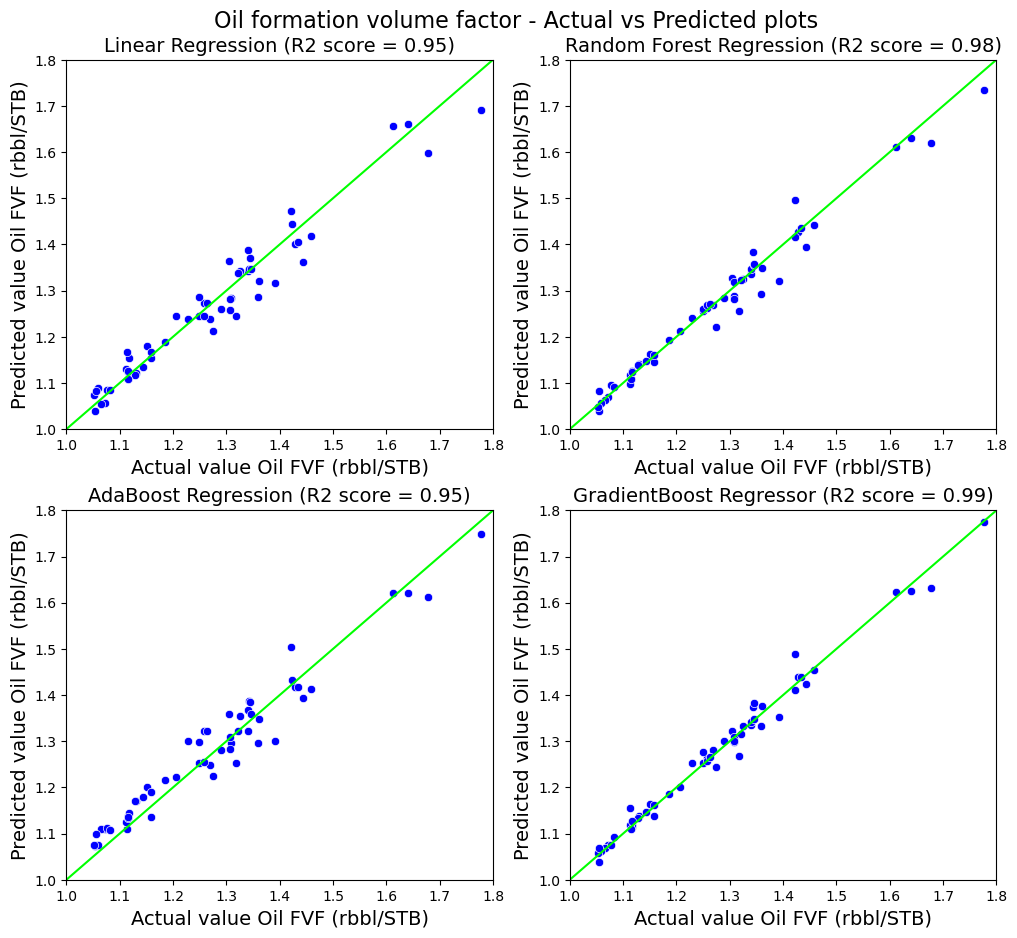

In [461]:
fig = plt.figure(figsize = (12,10))

fig.add_subplot(2,2,1)
#plt.figure(figsize=(5,5))
sns.scatterplot(x =y_val,y = y_pred, color ="blue")
plt.plot((0,1.8),(0,1.8), c= 'lime')
#plt.figsize(10,10)
plt.title(f'Linear Regression (R2 score = {round(r2_lin1,2)})',fontsize = 14)
plt.xlabel('Actual value Oil FVF (rbbl/STB)',fontsize = 14)
plt.ylabel('Predicted value Oil FVF (rbbl/STB)',fontsize = 14)
plt.xlim(1,1.8)
plt.ylim(1,1.8)


########################################################
fig.add_subplot(2,2,2)
#plt.figure(figsize=(5,5))
sns.scatterplot(x= y_val,y =y_pred2, color ="blue")
plt.plot((0,1.8),(0,1.8), c= 'lime')
#plt.figsize(10,10)
plt.title(f'Random Forest Regression (R2 score = {round(r2_rf1,2)})',fontsize = 14)
plt.xlabel('Actual value Oil FVF (rbbl/STB)',fontsize = 14)
plt.ylabel('Predicted value Oil FVF (rbbl/STB)',fontsize = 14)
plt.xlim(1,1.8)
plt.ylim(1,1.8)

########################################################
fig.add_subplot(2,2,3)
#plt.figure(figsize=(5,5))
sns.scatterplot(x = y_val,y = y_pred3, color ="blue")
plt.plot((0,1.8),(0,1.8), c= 'lime')
#plt.figsize(10,10)
plt.title(f'AdaBoost Regression (R2 score = {round(r2_ada1,2)})',fontsize = 14)
plt.xlabel('Actual value Oil FVF (rbbl/STB)',fontsize = 14)
plt.ylabel('Predicted value Oil FVF (rbbl/STB)',fontsize = 14)
plt.xlim(1,1.8)
plt.ylim(1,1.8)

########################################################
fig.add_subplot(2,2,4)
#plt.figure(figsize=(5,5))
sns.scatterplot(x = y_val,y = y_pred4, color ="blue")
plt.plot((0,1.8),(0,1.8), c= 'lime')
#plt.figsize(10,10)
plt.title(f'GradientBoost Regressor (R2 score = {round(r2_gb1,2)})',fontsize = 14)
plt.xlabel('Actual value Oil FVF (rbbl/STB)',fontsize = 14)
plt.ylabel('Predicted value Oil FVF (rbbl/STB)',fontsize = 14)
plt.xlim(1,1.8)
plt.ylim(1,1.8)

#################
fig.suptitle('Oil formation volume factor - Actual vs Predicted plots', fontsize  = 16)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.18, hspace=0.22)
fig.subplots_adjust(top=0.93)
plt.savefig('Oil FVF Actual vs Pred val data.png', dpi = 1200,  bbox_inches='tight')
plt.show()

# Residual plots

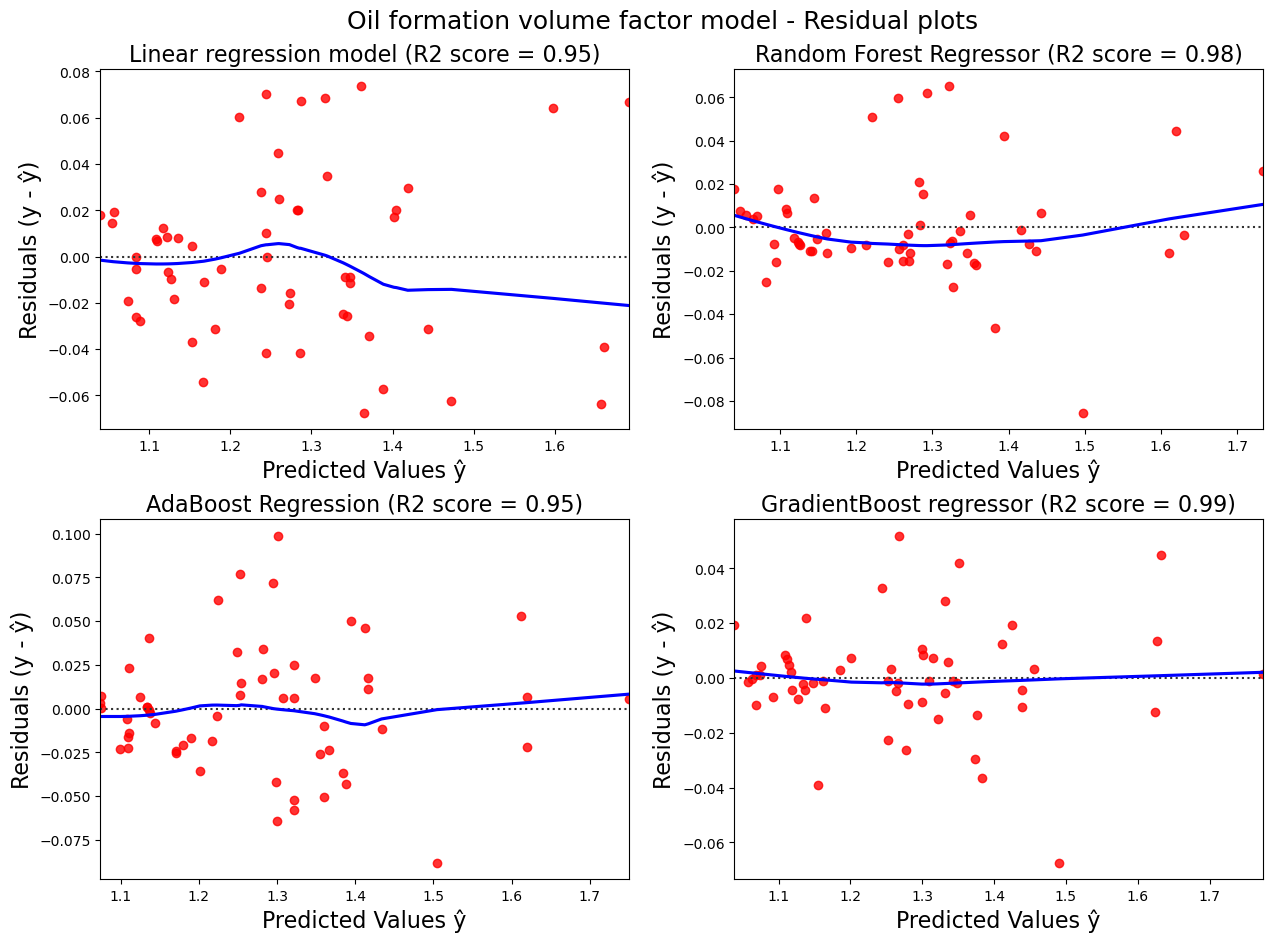

In [469]:
fig = plt.figure(figsize = (15,10))

fig.add_subplot(2,2,1)
# Calculate residuals
predicted = y_pred
residuals = y_val - y_pred

# residual plots for linear regression
sns.residplot(x = predicted, y = residuals, lowess=True,color='red', line_kws=dict(color="blue"))
plt.xlabel('Predicted Values ŷ',fontsize = 16)
plt.ylabel('Residuals (y - ŷ)',fontsize = 16)
plt.title(f'Linear regression model (R2 score = {round(r2_lin1,2)})',fontsize = 16)
#plt.show()

########################################################
fig.add_subplot(2,2,2)
# Calculate residuals
predicted = y_pred2
residuals2 = y_val - y_pred2

# residual plots for Random Forest Regressor
sns.residplot(x = predicted, y = residuals2, lowess=True,color='red', line_kws=dict(color="blue"))
plt.xlabel('Predicted Values ŷ',fontsize = 16)
plt.ylabel('Residuals (y - ŷ)',fontsize = 16)
plt.title(f'Random Forest Regressor (R2 score = {round(r2_rf1,2)})',fontsize = 16)
#plt.show()

########################################################
fig.add_subplot(2,2,3)
# Calculate residuals
predicted = y_pred3
residuals3 = y_val - y_pred3

# residual plots for XGBoost regressor

sns.residplot(x = predicted, y = residuals3, lowess=True, color='red', line_kws=dict(color="blue"))
plt.xlabel('Predicted Values ŷ',fontsize = 16)
plt.ylabel('Residuals (y - ŷ)',fontsize = 16)
plt.title(f'AdaBoost Regression (R2 score = {round(r2_ada1,2)})',fontsize = 16)
#plt.show()

########################################################
fig.add_subplot(2,2,4)
# Calculate residuals
predicted = y_pred4
residuals4 = y_val - y_pred4

# residual plots for XGBoost regressor
sns.residplot(x = predicted, y = residuals4, lowess=True, color = "red", line_kws=dict(color="blue"))
plt.xlabel('Predicted Values ŷ', fontsize = 16)
plt.ylabel('Residuals (y - ŷ)',fontsize = 16)
plt.title(f'GradientBoost regressor (R2 score = {round(r2_gb1,2)})',fontsize = 16)

#################
fig.suptitle('Oil formation volume factor model - Residual plots', fontsize  = 18)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.25)
fig.subplots_adjust(top=0.92)
plt.savefig('Residual scatter plot oil fvf model.png', dpi = 1200,  bbox_inches='tight')
plt.show()

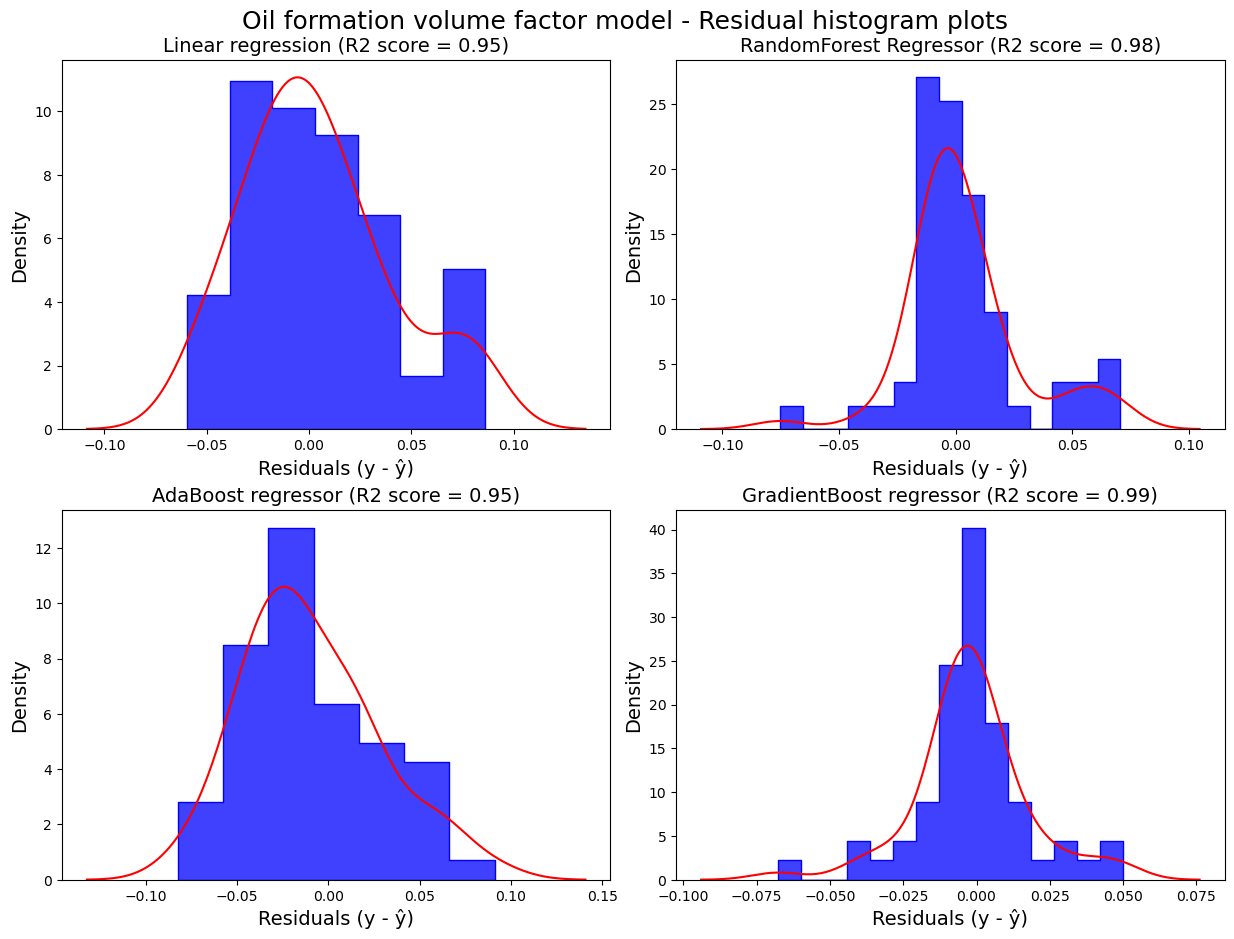

In [470]:
fig = plt.figure(figsize = (15,10))
palette = ['springgreen']
color_name = 'blue'

fig.add_subplot(2,2,1)
# Calculate residuals
predicted = y_pred
residuals = y_val - y_pred

# residual plots for linear regression
sns.histplot(x=residuals, stat = 'density',kde=False,element = "step" ,color = color_name)
sns.kdeplot(x = residuals, color='red')
plt.ylabel('Density',fontsize = 14)
plt.xlabel('Residuals (y - ŷ)',fontsize = 14)
plt.title(f'Linear regression (R2 score = {round(r2_lin1,2)})',fontsize = 14)
#plt.show()

########################################################
fig.add_subplot(2,2,2)
# Calculate residuals
predicted = y_pred2
residuals2 = y_val - y_pred2

# residual plots for Random Forest Regressor
sns.histplot(x=residuals2, stat = 'density',kde=False,element = "step",color = color_name)
sns.kdeplot(x = residuals2, color='red')
plt.ylabel('Density',fontsize = 14)
plt.xlabel('Residuals (y - ŷ)',fontsize = 14)
plt.title(f'RandomForest Regressor (R2 score = {round(r2_rf1,2)})',fontsize = 14)
#plt.show()

########################################################
fig.add_subplot(2,2,3)
# Calculate residuals
predicted = y_pred3
residuals3 = y_val - y_pred3

# residual plots for AdaBoost regressor

sns.histplot(x=residuals3, stat = 'density',kde=False,element = "step",color = color_name)
sns.kdeplot(x = residuals3, color='red')
plt.ylabel('Density',fontsize = 14)
plt.xlabel('Residuals (y - ŷ)',fontsize = 14)
plt.title(f'AdaBoost regressor (R2 score = {round(r2_ada1,2)})',fontsize = 14)
#plt.show()

########################################################
fig.add_subplot(2,2,4)
# Calculate residuals
predicted = y_pred4
residuals4 = y_val - y_pred4

# residual plots for GradientBoost regressor
sns.histplot(x=residuals4, stat = 'density',kde=False,element = "step",color = color_name)
sns.kdeplot(x = residuals4, color='red')
plt.ylabel('Density',fontsize = 14)
plt.xlabel('Residuals (y - ŷ)',fontsize = 14)
plt.title(f'GradientBoost regressor (R2 score = {round(r2_gb1,2)})',fontsize = 14)

#################
fig.suptitle('Oil formation volume factor model - Residual histogram plots', fontsize  = 18)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.12, hspace=0.22)
fig.subplots_adjust(top=0.93)
plt.savefig('Residual Hist plots OIL FVF model.png', dpi = 1200,  bbox_inches='tight')
plt.show()

## Comparision

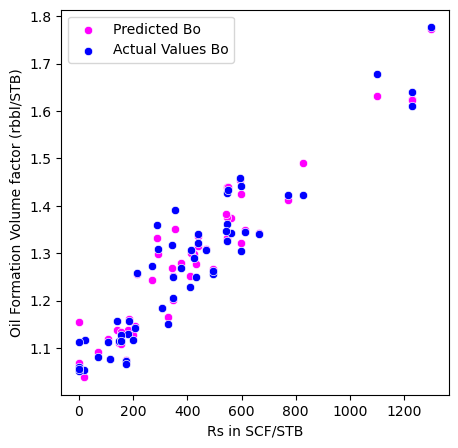

In [401]:
plt.figure(figsize=(5,5))
sns.scatterplot(x = X_val['Rs_SCF/STB'],y = y_pred4, label = 'Predicted Bo',color = 'fuchsia')
sns.scatterplot(x= X_val['Rs_SCF/STB'],y = y_val, label = 'Actual Values Bo',color = "blue")
plt.xlabel('Rs in SCF/STB')
plt.ylabel('Oil Formation Volume factor (rbbl/STB)')
plt.legend()
plt.savefig('pred vs actual Rs scatter.png', dpi = 1200)

# Common correlations for Oil FVF prediction

In [288]:
#X_val.head()

In [289]:
X_comp = X_val.copy()
X_comp.reset_index(inplace =True)

# Predictions on test data (unseen)

In [5]:
Pb= 1775 # bubble point pressure of Goldie-1 well

# The unseen test data is taken from Goldie-1BHS well

In [304]:
df_test_data_for_corr = pd.read_excel(###########cmg trial\ML models with cmg\Goldie1BHS_test_data_model\test_data_corr_Bo_cmg_model.xlsx")
# Goldie - 1 test data for corr
df_test_data = pd.read_excel(############cmg trial\ML models with cmg\Goldie1BHS_test_data_model\Bo_model_test_data_goldie1_cmg_model.xlsx")

In [306]:
y_pred4_unseen = reg_gb.predict(df_test_data[['Rs_SCF/STB', 'oil_des_60', 'gas_spgr', 'Temp_F']])
y_pred2_unseen = reg_rf.predict(df_test_data[['Rs_SCF/STB', 'oil_des_60', 'gas_spgr', 'Temp_F']])
y_pred3_unseen = reg_ada.predict(df_test_data[['Rs_SCF/STB', 'oil_des_60', 'gas_spgr', 'Temp_F']])
y_pred5_unseen = reg_xgb.predict(df_test_data[['Rs_SCF/STB', 'oil_des_60', 'gas_spgr', 'Temp_F']])
y_pred1_unseen = regl.predict(df_test_data[['Rs_SCF/STB', 'oil_des_60', 'gas_spgr', 'Temp_F']])

# Model evaluation metrics for unseen dataset of Goldie-1 BHS

In [394]:
me_lin = metrics.max_error(df_test_data['Oil_FVF'], y_pred1_unseen)  # linnear regression
print("MaxEr_lin: ", round(me_lin,2))
me_rf = metrics.max_error(df_test_data['Oil_FVF'], y_pred2_unseen)  # random forest regressor
print("MaxEr_rf: ", round(me_rf,2))
me_ada = metrics.max_error(df_test_data['Oil_FVF'], y_pred3_unseen)  # Ada Boost regression
print("MaxEr_ada: ", round(me_ada,2))
me_gb = metrics.max_error(df_test_data['Oil_FVF'], y_pred4_unseen)  # Gradient boost
print("MaxEr_gb: ", round(me_gb,2))
#######################################################
mae_lin = metrics.mean_absolute_error(df_test_data['Oil_FVF'], y_pred1_unseen)  # linnear regression
print("MAE_lin: ", round(mae_lin,2))
mae_rf = metrics.mean_absolute_error(df_test_data['Oil_FVF'], y_pred2_unseen)  # random forest regressor
print("MAE_rf: ", round(mae_rf,3))
mae_ada = metrics.mean_absolute_error(df_test_data['Oil_FVF'], y_pred3_unseen)  # Ada Boost regression
print("MAE_ada: ", round(mae_ada,2))
mae_gb = metrics.mean_absolute_error(df_test_data['Oil_FVF'], y_pred4_unseen)  # Gradient boost
print("MAE_gb: ", round(mae_gb,2))
#######################################################
mse_lin = metrics.mean_squared_error(df_test_data['Oil_FVF'], y_pred1_unseen)  # linnear regression
print("MSE_lin: ", round(mse_lin,3))
mse_rf = metrics.mean_squared_error(df_test_data['Oil_FVF'], y_pred2_unseen)  # random forest regressor
print("MSE_rf: ", round(mse_rf,3))
mse_ada = metrics.mean_squared_error(df_test_data['Oil_FVF'], y_pred3_unseen)  # Ada Boost regression
print("MSE_ada: ", round(mse_ada,3))
mse_gb = metrics.mean_squared_error(df_test_data['Oil_FVF'], y_pred4_unseen)  # Gradient boost
print("MSE_gb: ", round(mse_gb,3))
#######################################################
rmse_lin = mse_lin**(1/2)
print("RMSE_lin: ", round(rmse_lin,3))
rmse_rf = mse_rf**(1/2)
print("RMSE_rf: ", round(rmse_rf,3))
rmse_ada = mse_ada**(1/2)
print("RMSE_ada: ", round(rmse_ada,3))
rmse_gb = mse_gb**(1/2)
print("RMSE_gb: ", round(rmse_gb,3))
#######################################################
mape_lin = metrics.mean_absolute_percentage_error(df_test_data['Oil_FVF'], y_pred1_unseen) # linear regression
print("MAPE Linear Regression: ",round(mape_lin,2))
mape_rf = metrics.mean_absolute_percentage_error(df_test_data['Oil_FVF'], y_pred2_unseen) # random forest regressor
print("MAPE Random forest regressor: ",round(mape_rf,2))
mape_ada = metrics.mean_absolute_percentage_error(df_test_data['Oil_FVF'], y_pred3_unseen) # ada boost regressor
print("MAPE Ada Boost Regressor: ",round(mape_ada,2))
mape_gb = metrics.mean_absolute_percentage_error(df_test_data['Oil_FVF'], y_pred4_unseen) # Gradient boost regressor
print("MAPE Gradient Boost Regressor: ",round(mape_gb,2))
#######################################################
r2_lin = metrics.r2_score(df_test_data['Oil_FVF'],y_pred1_unseen)  # Linear regression
print("R2-Score Linear Regression: ",round(r2_lin,2))
r2_rf = metrics.r2_score(df_test_data['Oil_FVF'],y_pred2_unseen)  # Random forest regressor
print("R2-Score Random Forest Regressor: ",round(r2_rf,2))
r2_ada = metrics.r2_score(df_test_data['Oil_FVF'],y_pred3_unseen)  # AdaBoost regressor
print("R2-Score Ada Boost Regressor: ",round(r2_ada,2))
r2_gb = metrics.r2_score(df_test_data['Oil_FVF'],y_pred4_unseen)  # GradientBoost regression
print("R2-Score Gradient Boost Regressor: ",round(r2_gb,2))

MaxEr_lin:  0.05
MaxEr_rf:  0.01
MaxEr_ada:  0.04
MaxEr_gb:  0.01
MAE_lin:  0.02
MAE_rf:  0.007
MAE_ada:  0.01
MAE_gb:  0.01
MSE_lin:  0.001
MSE_rf:  0.0
MSE_ada:  0.0
MSE_gb:  0.0
RMSE_lin:  0.027
RMSE_rf:  0.008
RMSE_ada:  0.017
RMSE_gb:  0.008
MAPE Linear Regression:  0.02
MAPE Random forest regressor:  0.01
MAPE Ada Boost Regressor:  0.01
MAPE Gradient Boost Regressor:  0.01
R2-Score Linear Regression:  0.6
R2-Score Random Forest Regressor:  0.97
R2-Score Ada Boost Regressor:  0.84
R2-Score Gradient Boost Regressor:  0.97


In [412]:
models = ['Linear regression','RandomForest regressor','AdaBoost regressor','GradientBoost regressor']
me2 = [me_lin,me_rf,me_ada,me_gb]
mae2 = [mae_lin,mae_rf,mae_ada, mae_gb]
mse2 = [mse_lin,mse_rf,mse_ada,mse_gb]
rmse2 = [rmse_lin,rmse_rf,rmse_ada,rmse_gb]
mape2 = [mape_lin,mape_rf,mape_ada,mape_gb]
r2score2 = [r2_lin,r2_rf,r2_ada,r2_gb]

me2 = [round(i,2) for i in me2]
mae2 = [round(i,2) for i in mae2]
mse2 = [round(i,3) for i in mse2]
rmse2 = [round(i,2) for i in rmse2]
mape2 = [round(i,2) for i in mape2]
r2score2 = [round(i,2) for i in r2score2]

model_eval2 = pd.DataFrame(data={"Model":models,"MAE": mae2,"MSE":mse2,"RMSE":rmse2,"MAPE":mape2, "Max Error": me2,"R2 Score":r2score2})
model_eval2.to_csv(###########\cmg trial\ML models with cmg\model eval results\oil fvf model result\OIL FVF model results unseen data.csv", index = False)
model_eval2

,Model,MAE,MSE,RMSE,MAPE,Max Error,R2 Score
0,Linear regression,0.02,0.001,0.03,0.02,0.05,0.60
1,RandomForest regressor,0.01,0.000,0.01,0.01,0.01,0.97
2,AdaBoost regressor,0.01,0.000,0.02,0.01,0.04,0.84
3,GradientBoost regressor,0.01,0.000,0.01,0.01,0.01,0.97


0.9656985724816568

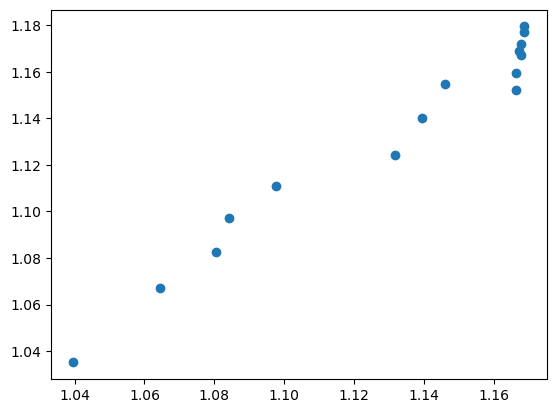

In [363]:
plt.scatter(y_pred4_unseen,df_test_data['Oil_FVF'])
metrics.r2_score(y_pred4_unseen,df_test_data['Oil_FVF'])

0.9656985724816568

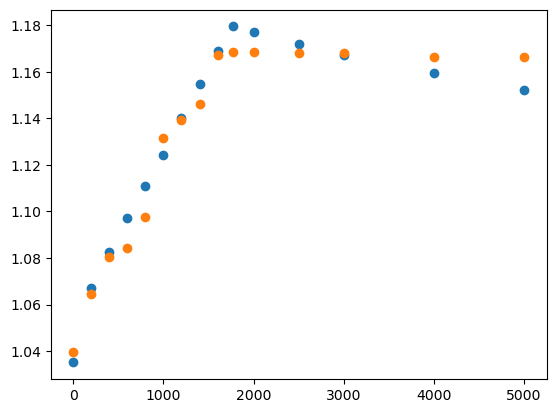

In [309]:
plt.scatter(df_test_data['P_psia'],df_test_data['Oil_FVF'])
plt.scatter(df_test_data['P_psia'],y_pred4_unseen)
metrics.r2_score(y_pred4_unseen,df_test_data['Oil_FVF'])

In [310]:
y_pred4_unseen

array([1.16634547, 1.16634547, 1.16790521, 1.16790521, 1.16873199,
       1.16873199, 1.16715013, 1.14616826, 1.13947736, 1.1317668 ,
       1.09758923, 1.08420275, 1.08039186, 1.06447731, 1.03962137])

# CMG output

In [311]:
df_cmg = pd.read_excel(########ML_model_pvt_training_data\cmg model test\cmg output Goldie 1\cmg output goldie 1.xlsx") # goldie1 using CMG IMEX

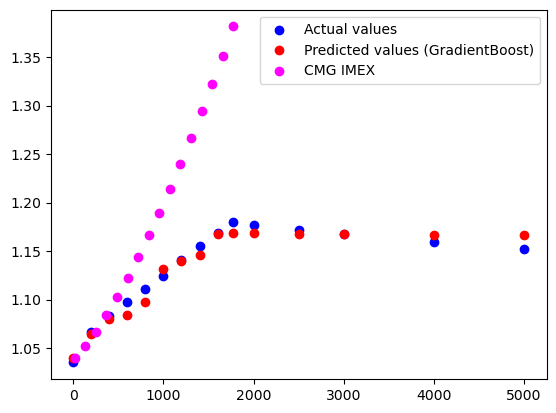

In [312]:
plt.scatter(df_test_data['P_psia'],df_test_data['Oil_FVF'], color = "blue", label ="Actual values")
plt.scatter(df_test_data['P_psia'],y_pred4_unseen, color = 'red', label = "Predicted values (GradientBoost)")
plt.scatter(df_cmg['P_psi'],df_cmg['Bo'], color = "magenta", label = "CMG IMEX")
plt.legend()
#plt.ylim(0,2)

## 01 Al-Marhoun (2003)

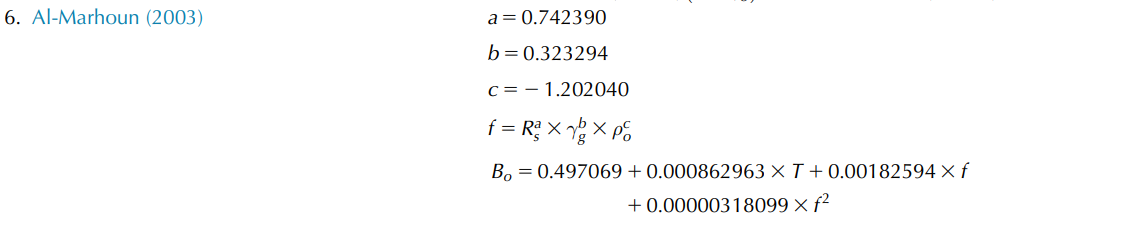

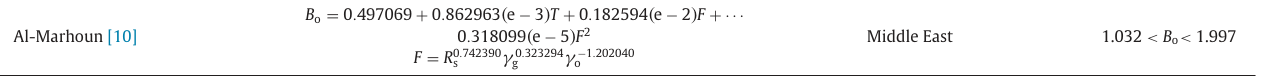

In [313]:
almah_2003 = []
a = 0.742390
b = 0.323294
c = -1.202040
df_corr = df_test_data_for_corr
for i in range(len(df_test_data_for_corr)):
    f = ((df_corr["Rs_SCF/STB"][i])**a) * ((df_corr['gas_spgr'][i])**b) * ((df_corr['oil_des_60'][i])**c)
    bo_almh = 0.497069 + 0.000862963 * (df_corr["Temp_F"][i]+460) + 0.00182594*f + 0.00000318099*(f)**2
    almah_2003.append(bo_almh)
print(almah_2003)    

[1.1830687419866923, 1.1652871251469383, 1.1479589528931262, 1.130159084368019, 1.112849638679006, 1.0954818145951295, 1.0760131495979333, 1.0545416391516502, 1.017435689]


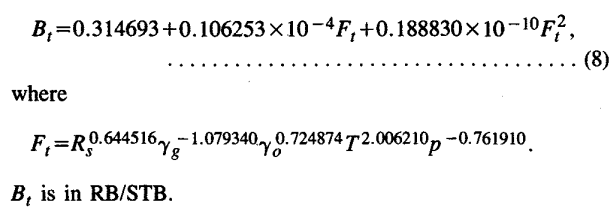

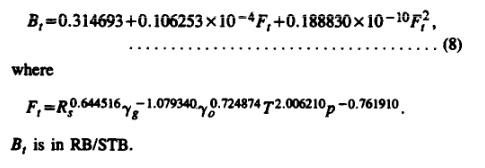
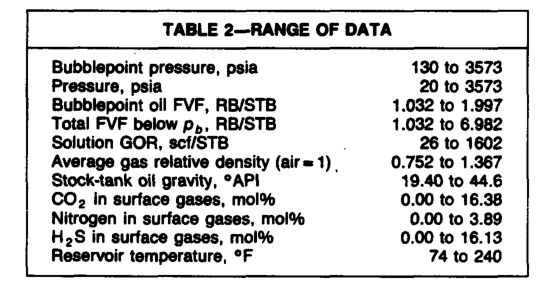

In [314]:
almah_1988 = []
a = 0.644516
b = -1.079340
c = 0.724874
d = 2.006210
e = -0.761910
df_corr = df_test_data_for_corr
for i in range(len(df_test_data_for_corr)):
    f = ((df_corr["Rs_SCF/STB"][i])**a) * ((df_corr['gas_spgr'][i])**b) * ((df_corr['oil_des_60'][i])**c) * ((df_corr['Temp_F'][i])**d) *((df_corr['P_psia'][i])**e) 
    bo_almh_1988 = 0.314693 + (0.106253*f*(10**(-4))) + (f**2)*0.188830*(10**(-10))
    almah_1988.append(bo_almh_1988)
print(almah_1988)  


# gives incorrect values

[0.3630963632968945, 0.36458040382545076, 0.3659640174578124, 0.3674736989547159, 0.36940706470785434, 0.3717661488658263, 0.3744057653347209, 0.3787476199957574, nan]


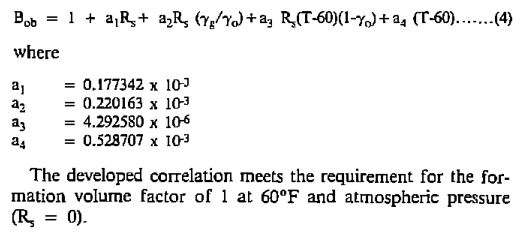

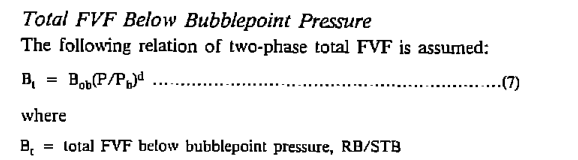
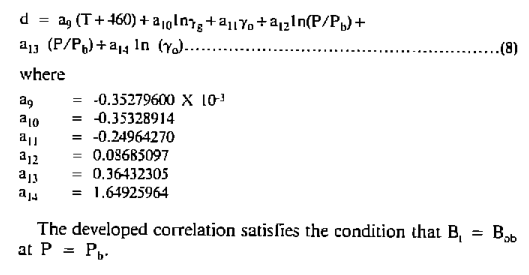

In [315]:
almah_1992 = []
a1 = 0.177342*10**(-3)
a2 = 0.220163*10**(-3)
a3 = 4.292580*10**(-3)
a4 = 0.528707*10**(-3)

a9 = -0.35279600*10**(-3)
a10 = -0.35328914
a11 = -0.24964270
a12 = 0.08685097
a13 = 0.36432305
a14 = 1.64925964

df_corr = df_test_data_for_corr
for i in range(len(df_test_data_for_corr)):
    bo_almh_1992 = 1 + a1*(df_corr['Rs_SCF/STB'][i]) + a2*(df_corr['Rs_SCF/STB'][i])*((df_corr['gas_spgr'][i])/(df_corr['oil_des_60'][i])) + a3*(df_corr['Rs_SCF/STB'][i])*((df_corr['Temp_F'][i]) - 60)*(1-(df_corr['oil_des_60'][i]))+a4*((df_corr['Temp_F'][i]) - 60)
    d = a9 * (df_corr['Temp_F'][i]) + a10*np.log(df_corr['gas_spgr'][i]) + a11*(df_corr['oil_des_60'][i]) + a12*np.log((df_corr["P_psia"][i])/Pb) + a13 *((df_corr["P_psia"][i])/Pb) + a14*np.log((df_corr['oil_des_60'][i]))
    bt_almh_1992 = bo_almh_1992*((df_corr["P_psia"][i])/Pb)**d
    almah_1992.append(bt_almh_1992)
print(almah_1992)    

# gives incorrect values

[23.604038179626023, 20.944348793338847, 18.59643469659678, 16.42876480387955, 14.660213644594048, 13.332542004785477, 12.326439965709271, 13.029092687457359, inf]


In [316]:
df_corr

,P_psia,Rs_SCF/STB,Oil_FVF,Oil_dens_g/cc,Deviation factor Z,Temp_F,gas_spgr,oil_des_60,API_60
0,1600,316,1.1691,0.7757,0.876,143,0.612,0.803173,44.676241
1,1400,279,1.1547,0.7812,0.886,143,0.610,0.808673,43.478020
2,1200,242,1.1403,0.7867,0.897,143,0.612,0.814173,42.295987
3,1000,204,1.1242,0.7926,0.908,143,0.615,0.820073,41.045615
4,800,167,1.1111,0.7984,0.920,143,0.621,0.825873,39.833849
5,600,130,1.0972,0.8038,0.935,143,0.633,0.831273,38.720854
6,400,90,1.0827,0.8093,0.951,143,0.652,0.836773,37.602015
7,200,49,1.0670,0.8154,0.971,143,0.697,0.842873,36.378198
8,0,0,1.0351,0.8296,1.000,143,0.952,0.857073,33.596789


## 02 correlation
## Arps (1962)

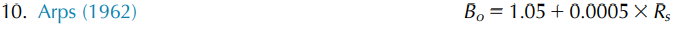

In [317]:
arps_1962 = []
df_corr = df_test_data_for_corr
for i in range(len(df_test_data_for_corr)):
    bo_arps = 1.05+0.0005* df_corr['Rs_SCF/STB'][i]
    arps_1962.append(bo_arps)
print(arps_1962)    

[1.208, 1.1895, 1.171, 1.1520000000000001, 1.1335, 1.115, 1.095, 1.0745, 1.05]


In [318]:
df_corr.head()

,P_psia,Rs_SCF/STB,Oil_FVF,Oil_dens_g/cc,Deviation factor Z,Temp_F,gas_spgr,oil_des_60,API_60
0,1600,316,1.1691,0.7757,0.876,143,0.612,0.803173,44.676241
1,1400,279,1.1547,0.7812,0.886,143,0.610,0.808673,43.478020
2,1200,242,1.1403,0.7867,0.897,143,0.612,0.814173,42.295987
3,1000,204,1.1242,0.7926,0.908,143,0.615,0.820073,41.045615
4,800,167,1.1111,0.7984,0.920,143,0.621,0.825873,39.833849


## 03 correlation
## Bolondarzadeh (2006) 

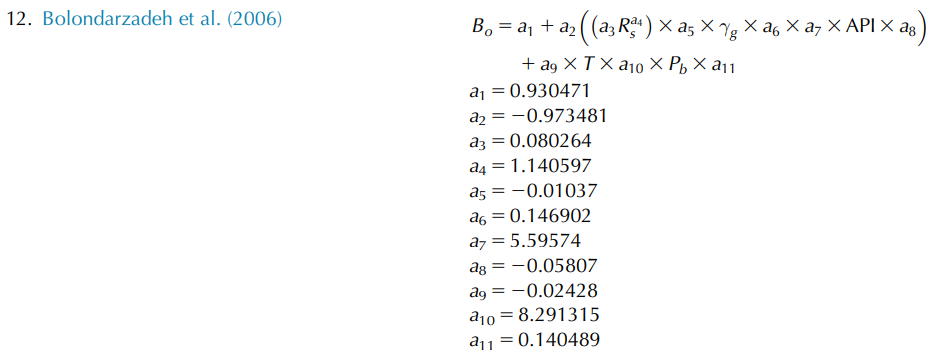

#### this is incorrect eqn see below correct version

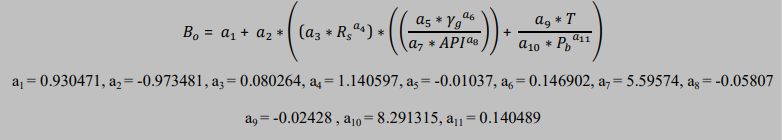

In [319]:
bolo_2006 = []
a1 = 0.930471
a2 = -0.973481
a3 = 0.080264
a4 = 1.140597
a5 = -0.01037
a6 = 0.146902
a7 = 5.59574
a8 = -0.05807
a9 = -0.02428
a10 = 8.291315
a11 = 0.140489
Pb = 1775

df_corr = df_test_data_for_corr
for i in range(len(df_test_data_for_corr)):
    #bo_bolo = a1 + a2*(((a3*((df_corr["Rs_SCF/STB"][i])**a4)))*a5*(df_corr["gas_spgr"][i])*a6*a7*(df_corr["API_60"][i])*a8)+ a9*(df_corr['Temp_F'][i])*a10*Pb*a11
    bo_bolo = a1 + a2*(((a3*((df_corr["Rs_SCF/STB"][i])**a4)))*((a5*(df_corr["gas_spgr"][i])**a6)/(a7*(df_corr["API_60"][i])**a8))+ (a9*(df_corr['Temp_F'][i]))/(a10*Pb**a11))
    bolo_2006.append(bo_bolo)
print(bolo_2006)    

[1.192203641631049, 1.1762027846486398, 1.160640859631244, 1.1450467429184394, 1.1303189515819256, 1.1161185141982026, 1.1014119562037437, 1.0872989409778442, 1.0729701114801868]


## 04 correlation
## Øistein GlasØ (1980)

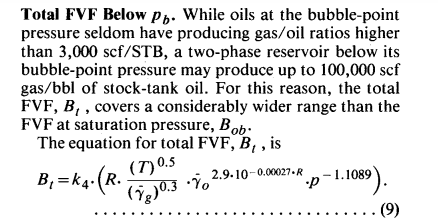
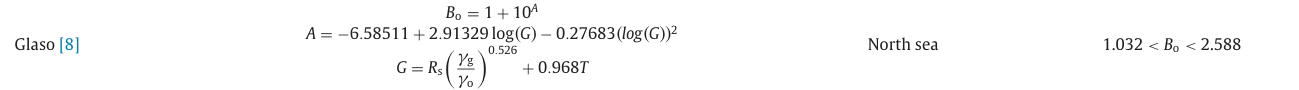

In [320]:
# correlation in use is shown below

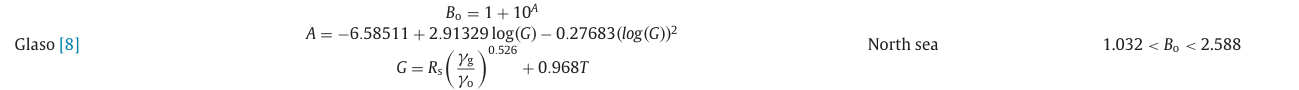

In [321]:
glaso_1980 = []
for i in range(len(df_test_data_for_corr)):
    G = (df_test_data_for_corr["Rs_SCF/STB"][i])*((df_test_data_for_corr["gas_spgr"][i]/df_test_data_for_corr["oil_des_60"][i])**0.526) + 0.968*(df_test_data_for_corr["Temp_F"][i])
    A = -6.58511+2.91329*np.log10(G)-0.27683*(np.log10(G))**2
    gls = 1 + 10**A
    glaso_1980.append(gls)
print(glaso_1980)

[1.1381859817931717, 1.1220157152271373, 1.1067957123735936, 1.0917781813145515, 1.0779051393302141, 1.064849465659406, 1.0514749362181695, 1.0387369794825383, 1.02419097486726]


## 05 Correlation
##  Hanafy et al. (1997)

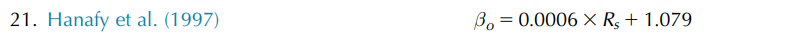

In [322]:
hana_1997 = []

for i in range(len(df_test_data_for_corr)):
    bo_hana = 0.0006*df_corr['Rs_SCF/STB'][i] + 1.079
    hana_1997.append(bo_hana)
print(hana_1997)    

[1.2686, 1.2464, 1.2242, 1.2014, 1.1792, 1.157, 1.133, 1.1084, 1.079]


## 06 Correlation
## Hemmati and Kharrat (2007)

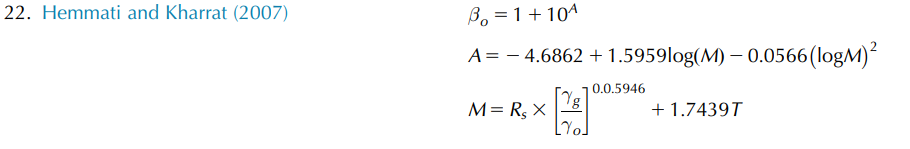

In [323]:
hemma_2007 = []

for i in range(len(df_test_data_for_corr)):
    M = (df_corr["Rs_SCF/STB"][i])*((df_corr["gas_spgr"][i])/(df_corr["Oil_dens_g/cc"][i]))**0.5946 +1.7439*(df_corr["Temp_F"][i])
    A = -4.6862 + 1.5959*np.log10(M) - 0.0566 * (np.log10(M))**2
    bo_hemma = 1 + 10**A
    hemma_2007.append(bo_hemma)
print(hemma_2007)    

[1.1717366248103147, 1.1576549849193007, 1.1443128562304892, 1.130972797653103, 1.1184438314965375, 1.1063997506802075, 1.0936560662186752, 1.080949159726234, 1.065130173069576]


## 07 Correlation
## Standing (1947)

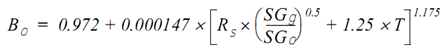

In [324]:
stand_1947 = []
for i in range(len(df_test_data_for_corr)):
    stnd = 0.972 + 0.000147*(df_test_data_for_corr["Rs_SCF/STB"][i]*((df_test_data_for_corr["gas_spgr"][i]/df_test_data_for_corr["oil_des_60"][i])**0.5)+1.25*(df_test_data_for_corr["Temp_F"][i]))**1.175
    stand_1947.append(stnd)

## 08 Correlation
## Standing (1981)

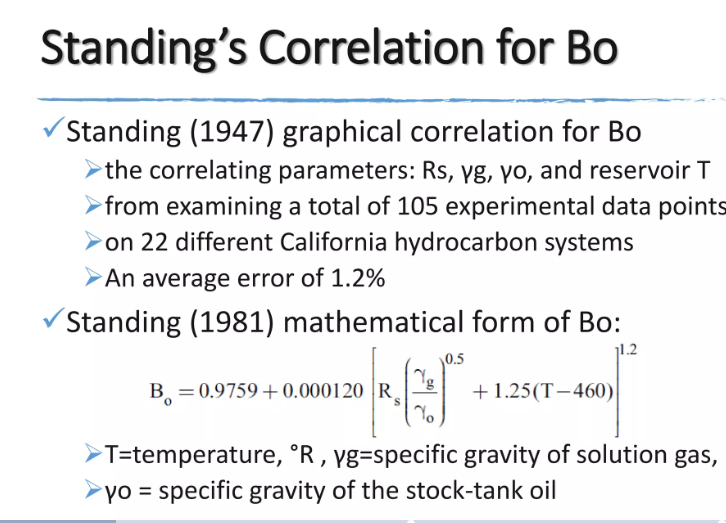

In [325]:
stand_1981 = []
for i in range(len(df_test_data_for_corr)):
    stnd_81 = 0.9759 + 0.000120*(df_test_data_for_corr["Rs_SCF/STB"][i]*((df_test_data_for_corr["gas_spgr"][i]/df_test_data_for_corr["oil_des_60"][i])**0.5)+1.25*(df_test_data_for_corr["Temp_F"][i]))**1.2
    stand_1981.append(stnd_81)

## 09 Correlation
## Sulaimon et al. (2014)

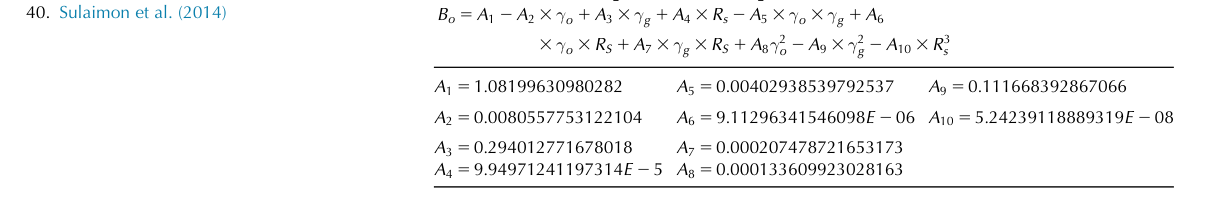

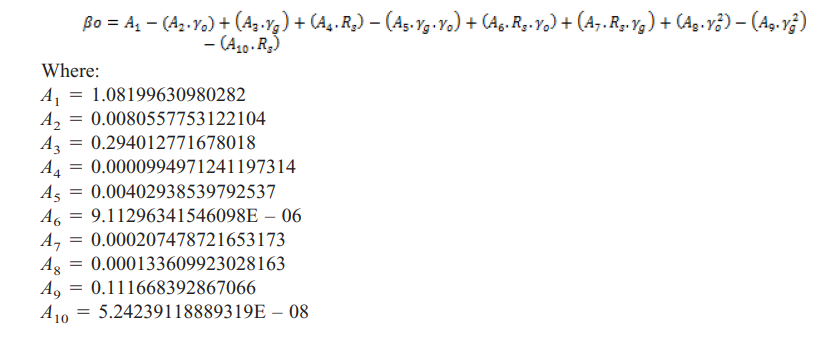

In [326]:
Sulaimon_2014 = []

A1 = 1.08199630980282
A2 = 0.0080557753122104
A3 = 0.294012771678018
A4 = 0.0000994971241197314
A5 = 0.00402938539792537
A6 = 9.11296341546098*(10)**(-6)
A7 = 0.000207478721653173
A8 = 0.000133609923028163
A9 = 0.111668392867066
A10 = 5.24239118889319*(10)**(-8)

for i in range(len(df_corr)):
    bo_sula = A1-(A2*df_corr["oil_des_60"][i]) + (A3*df_corr["gas_spgr"][i]) + (A4*df_corr["Rs_SCF/STB"][i]) - (A5*df_corr["gas_spgr"][i]* df_corr["oil_des_60"][i])+ (A6*df_corr["Rs_SCF/STB"][i] * df_corr["oil_des_60"][i])  + (A7*df_corr["Rs_SCF/STB"][i] * df_corr["gas_spgr"][i])+(A8*(df_corr["oil_des_60"][i])**2)-(A9*(df_corr["gas_spgr"][i])**2) - (A10*df_corr["Rs_SCF/STB"][i])
    Sulaimon_2014.append(bo_sula)
print(Sulaimon_2014)    

[1.285604941287937, 1.2764894600508057, 1.2682190063359957, 1.2598712695097458, 1.2522670023179265, 1.2456236617081657, 1.2391874851955667, 1.2359466172689924, 1.2505970056752878]


## 10  Correlation
## Milton Vazquez and H.D. Beggs (1977)

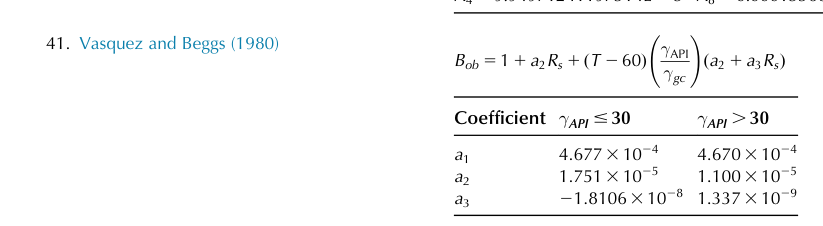

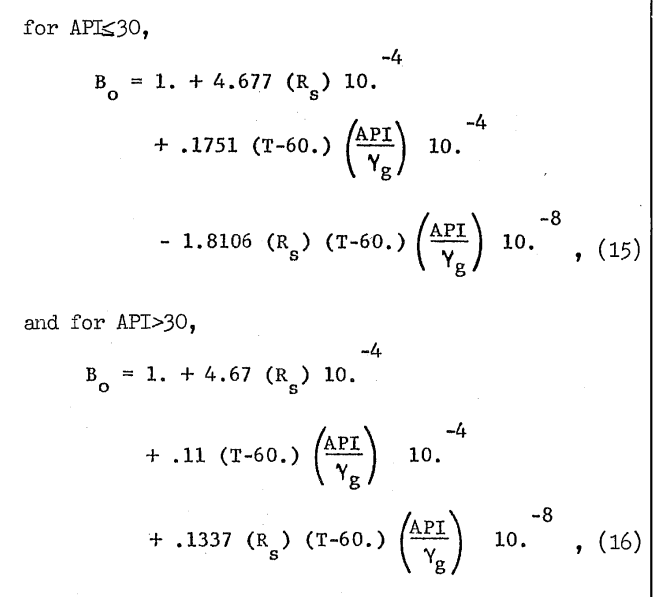

In [327]:
vzq = []

for i in range(len(df_test_data_for_corr)):
    if df_corr["API_60"][i] <= 30:
        bo_vzq = 1 + 4.677 *(df_corr['Rs_SCF/STB'][i]) * 10**(-4)+ 0.1751 * (df_corr["Temp_F"][i] - 60) *(10**(-4))*((df_corr['API_60'][i])/(df_corr["gas_spgr"][i]))  - 1.8106*(df_corr['Rs_SCF/STB'][i]) * (df_corr["Temp_F"][i] - 60) * ((df_corr['API_60'][i])/(df_corr["gas_spgr"][i])) * 10**(-8)
        vzq.append(bo_vzq)
    
    if df_corr["API_60"][i] > 30:    
        bo_vzq = 1 + 4.67 *(df_corr['Rs_SCF/STB'][i]) * 10**(-4)+ 0.11 * (df_corr["Temp_F"][i] - 60) *(10**(-4))*((df_corr['API_60'][i])/(df_corr["gas_spgr"][i]))  - 0.1337*(df_corr['Rs_SCF/STB'][i]) * (df_corr["Temp_F"][i] - 60) * ((df_corr['API_60'][i])/(df_corr["gas_spgr"][i])) * 10**(-8)
        vzq.append(bo_vzq)

print(vzq)    

[1.2116614666713759, 1.1931607259647252, 1.1742564477561312, 1.1546914996321462, 1.1353643576950212, 1.1156761039366792, 1.0941083639223008, 1.0702509842701, 1.0322204496878506]


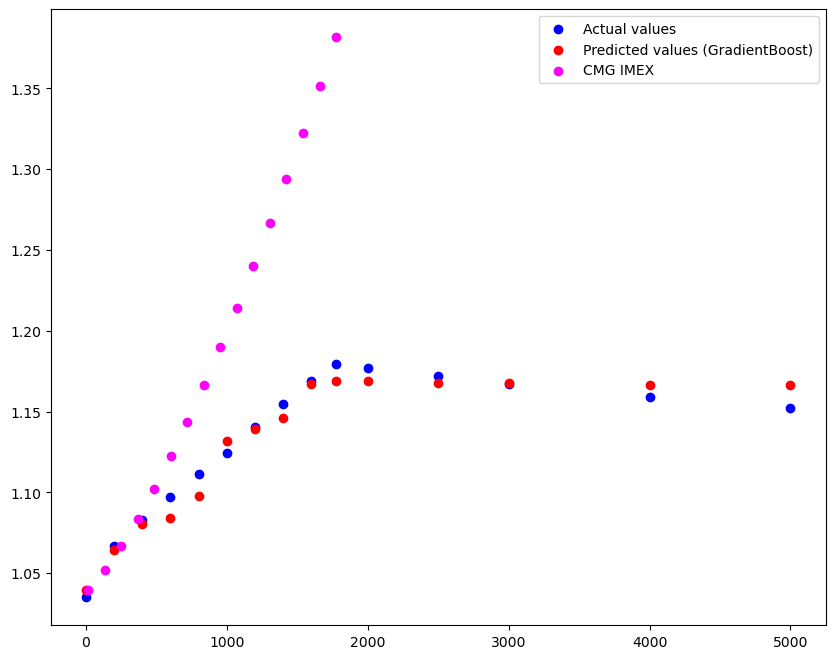

In [328]:
plt.figure(figsize = (10,8))
plt.scatter(df_test_data['P_psia'],df_test_data['Oil_FVF'], color = "blue", label ="Actual values")
plt.scatter(df_test_data['P_psia'],y_pred4_unseen, color = 'red', label = "Predicted values (GradientBoost)")
plt.scatter(df_cmg['P_psi'],df_cmg['Bo'], color = "magenta", label = "CMG IMEX")

plt.legend()
#plt.ylim(0,2)

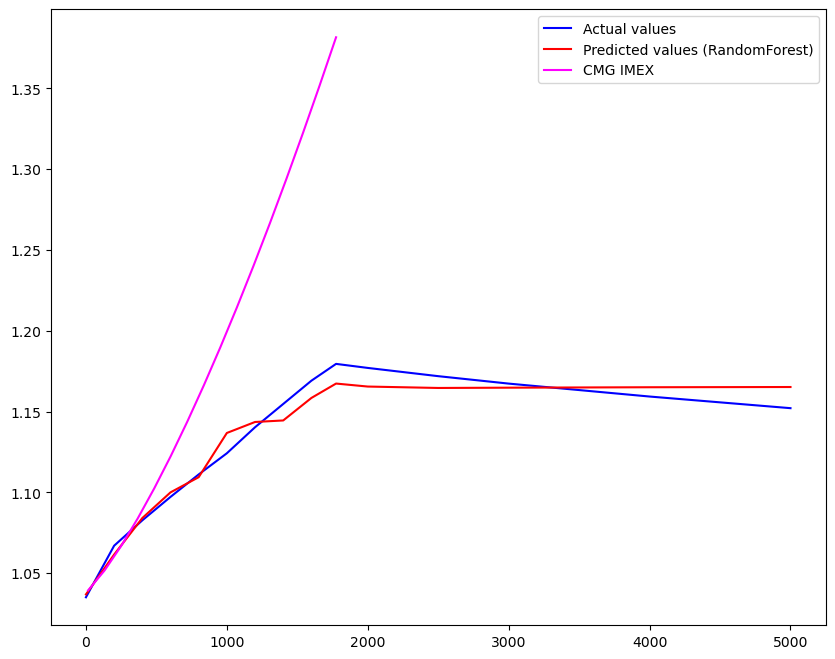

In [329]:
plt.figure(figsize = (10,8))
plt.plot(df_test_data['P_psia'],df_test_data['Oil_FVF'], color = "blue", label ="Actual values")
plt.plot(df_test_data['P_psia'],y_pred2_unseen, color = 'red', label = "Predicted values (RandomForest)")
plt.plot(df_cmg['P_psi'],df_cmg['Bo'], color = "magenta", label = "CMG IMEX")

plt.legend()
#plt.ylim(0,2)

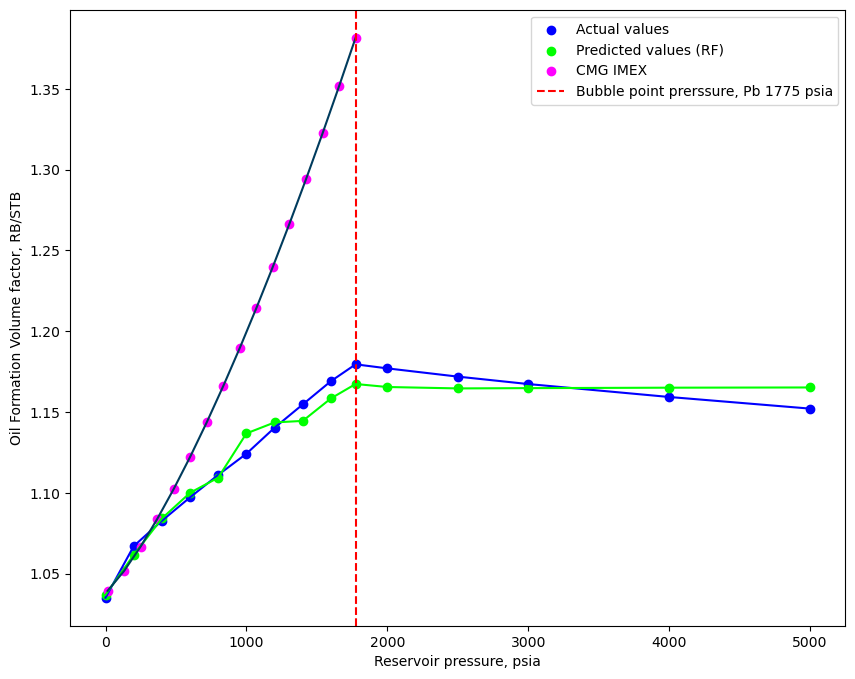

In [330]:
plt.figure(figsize = (10,8))
plt.scatter(df_test_data['P_psia'],df_test_data['Oil_FVF'], color = "blue" ,label ="Actual values")
# plt.scatter(df_test_data['P_psia'],y_pred4_unseen, color = 'lime', label = "Predicted values (GradientBoost)")
plt.scatter(df_test_data['P_psia'],y_pred2_unseen, color = 'lime', label = "Predicted values (RF)")
# plt.scatter(df_test_data['P_psia'],y_pred5_unseen, color = 'maroon', label = "Predicted values (XGBoost)")

plt.scatter(df_cmg['P_psi'],df_cmg['Bo'], color = "magenta", label = "CMG IMEX")


plt.plot(df_test_data['P_psia'],df_test_data['Oil_FVF'], color = "blue")
# plt.plot(df_test_data['P_psia'],y_pred4_unseen, color = 'lime')
plt.plot(df_test_data['P_psia'],y_pred2_unseen, color = 'lime')
# plt.plot(df_test_data['P_psia'],y_pred5_unseen, color = "magenta")
plt.plot(df_cmg['P_psi'],df_cmg['Bo'], color = '#003b5d')

plt.axvline(1775, linestyle = "--", color ="red", label = "Bubble point prerssure, Pb 1775 psia")
plt.xlabel('Reservoir pressure, psia')
plt.ylabel('Oil Formation Volume factor, RB/STB')
plt.legend()
#plt.ylim(0)

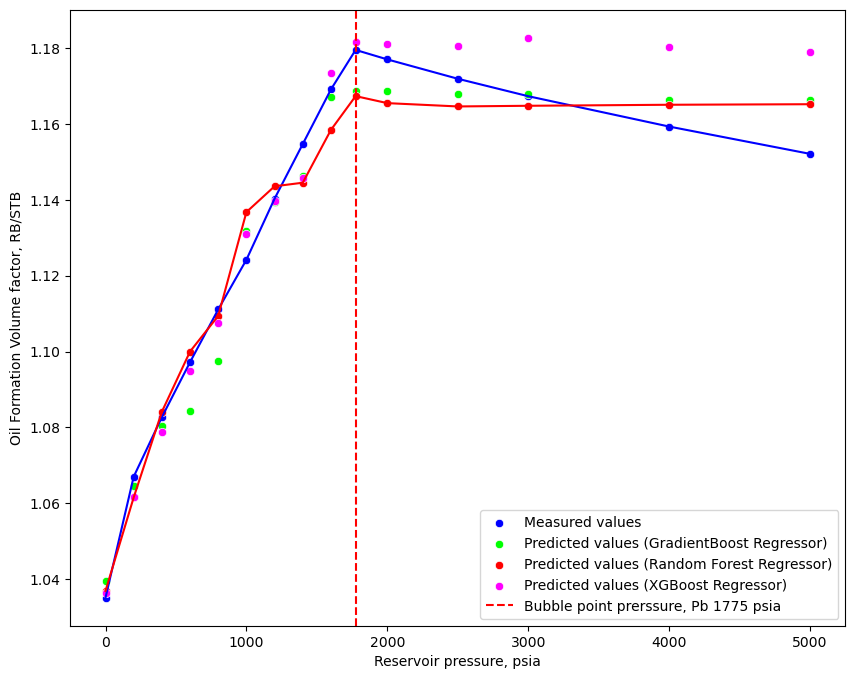

In [331]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = df_test_data['P_psia'],y = df_test_data['Oil_FVF'], color = "blue" ,label ="Measured values")
sns.scatterplot(x = df_test_data['P_psia'],y = y_pred4_unseen, color = 'lime', label = "Predicted values (GradientBoost Regressor)")
sns.scatterplot(x = df_test_data['P_psia'],y = y_pred2_unseen, color = 'red', label = "Predicted values (Random Forest Regressor)")
sns.scatterplot(x = df_test_data['P_psia'],y = y_pred5_unseen, color = 'magenta', label = "Predicted values (XGBoost Regressor)")


sns.lineplot(x = df_test_data['P_psia'],y = df_test_data['Oil_FVF'], color = "blue")
# plt.plot(df_test_data['P_psia'],y_pred4_unseen, color = 'lime')
sns.lineplot(x = df_test_data['P_psia'],y = y_pred2_unseen, color = 'red')
# plt.plot(df_test_data['P_psia'],y_pred5_unseen, color = "magenta")

plt.axvline(1775, linestyle = "--", color ="red", label = "Bubble point prerssure, Pb 1775 psia")
plt.xlabel('Reservoir pressure, psia')
plt.ylabel('Oil Formation Volume factor, RB/STB')

plt.legend()

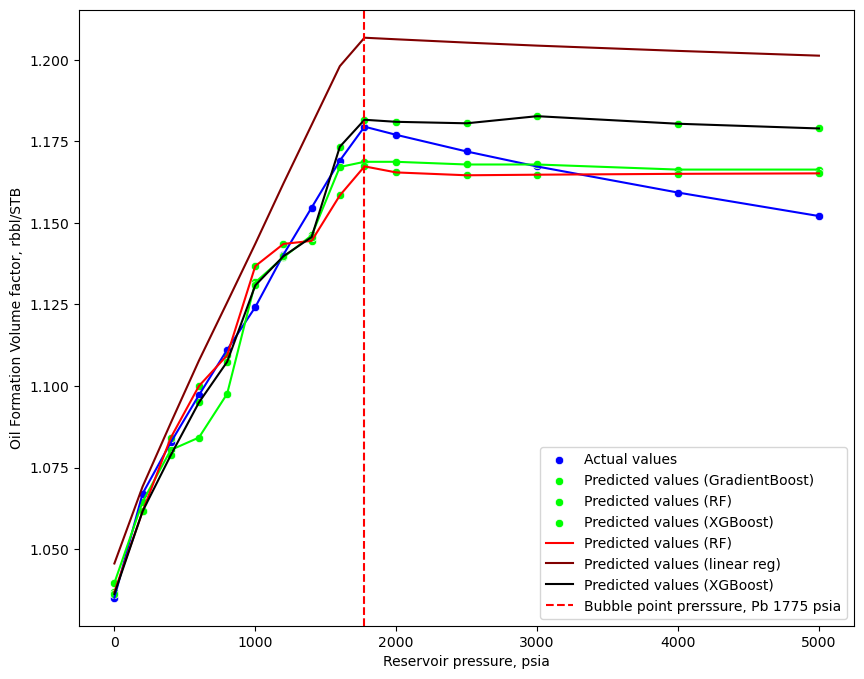

In [332]:
plt.figure(figsize = (10,8))

sns.scatterplot(x = df_test_data['P_psia'],y= df_test_data['Oil_FVF'], color = "blue" ,label ="Actual values")
sns.scatterplot(x =df_test_data['P_psia'],y = y_pred4_unseen, color = 'lime', label = "Predicted values (GradientBoost)")
sns.scatterplot(x =df_test_data['P_psia'],y = y_pred2_unseen, color = 'lime', label = "Predicted values (RF)")
sns.scatterplot(x =df_test_data['P_psia'],y = y_pred5_unseen, color = 'lime', label = "Predicted values (XGBoost)")
#sns.scatterplot(x = df_cmg['P_psi'],y= df_cmg['Bo'], color = "magenta", label = "CMG IMEX")


sns.lineplot(x = df_test_data['P_psia'],y=df_test_data['Oil_FVF'], color = "blue")
sns.lineplot(x = df_test_data['P_psia'],y=y_pred4_unseen, color = 'lime')
#sns.lineplot(x= df_cmg['P_psi'],y=df_cmg['Bo'], color = 'magenta')

sns.lineplot(x =df_test_data['P_psia'],y = y_pred2_unseen, color = 'red', label = "Predicted values (RF)")
sns.lineplot(x =df_test_data['P_psia'],y = y_pred1_unseen, color = 'maroon', label = "Predicted values (linear reg)")
sns.lineplot(x =df_test_data['P_psia'],y = y_pred5_unseen, color = 'black', label = "Predicted values (XGBoost)")

plt.axvline(1775, linestyle = "--", color ="red", label = "Bubble point prerssure, Pb 1775 psia")
plt.xlabel('Reservoir pressure, psia')
plt.ylabel('Oil Formation Volume factor, rbbl/STB')
plt.legend()
#plt.ylim(0)

In [334]:
df_test_data['Oil_FVF']

0     1.1521
1     1.1593
2     1.1673
3     1.1719
4     1.1770
5     1.1795
6     1.1691
7     1.1547
8     1.1403
9     1.1242
10    1.1111
11    1.0972
12    1.0827
13    1.0670
14    1.0351
Name: Oil_FVF, dtype: float64

In [335]:
df_test_data['P_psia']

0     5000
1     4000
2     3000
3     2500
4     2000
5     1775
6     1600
7     1400
8     1200
9     1000
10     800
11     600
12     400
13     200
14       0
Name: P_psia, dtype: int64

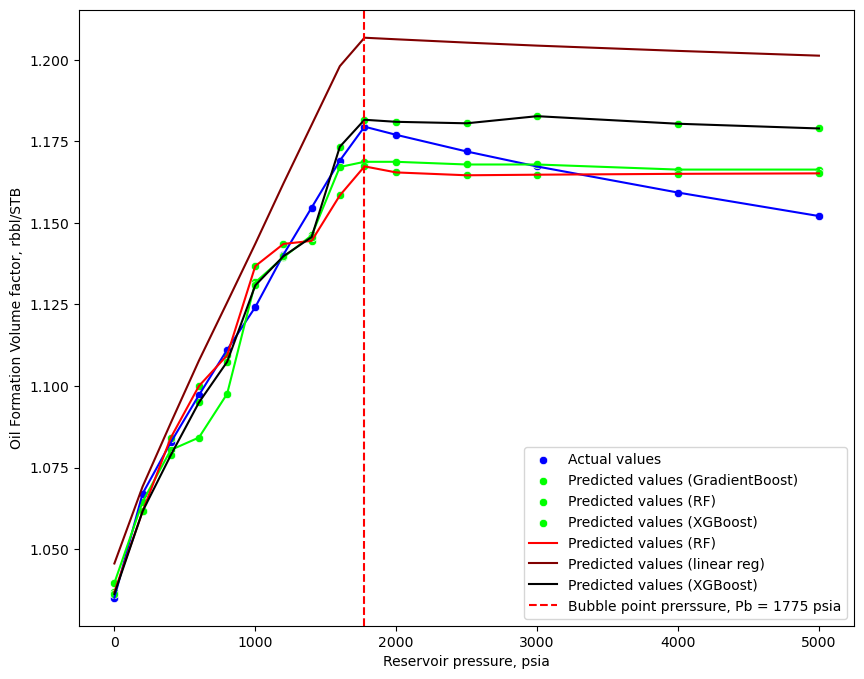

In [337]:
plt.figure(figsize = (10,8))

sns.scatterplot(x = df_test_data['P_psia'],y= df_test_data['Oil_FVF'], color = "blue" ,label ="Actual values")
sns.scatterplot(x =df_test_data['P_psia'],y = y_pred4_unseen, color = 'lime', label = "Predicted values (GradientBoost)")
sns.scatterplot(x =df_test_data['P_psia'],y = y_pred2_unseen, color = 'lime', label = "Predicted values (RF)")
sns.scatterplot(x =df_test_data['P_psia'],y = y_pred5_unseen, color = 'lime', label = "Predicted values (XGBoost)")
#sns.scatterplot(x = df_cmg['P_psi'],y= df_cmg['Bo'], color = "magenta", label = "CMG IMEX")

sns.lineplot(x = df_test_data['P_psia'],y=df_test_data['Oil_FVF'], color = "blue")
sns.lineplot(x = df_test_data['P_psia'],y=y_pred4_unseen, color = 'lime')
#sns.lineplot(x= df_cmg['P_psi'],y=df_cmg['Bo'], color = 'magenta')

sns.lineplot(x =df_test_data['P_psia'],y = y_pred2_unseen, color = 'red', label = "Predicted values (RF)")
sns.lineplot(x =df_test_data['P_psia'],y = y_pred1_unseen, color = 'maroon', label = "Predicted values (linear reg)")
sns.lineplot(x =df_test_data['P_psia'],y = y_pred5_unseen, color = 'black', label = "Predicted values (XGBoost)")

plt.axvline(1775, linestyle = "--", color ="red", label = "Bubble point prerssure, Pb = 1775 psia")
#plt.plot([5000,5000],[1.1521,])
# df_test_data['P_psia']

plt.xlabel('Reservoir pressure, psia')
plt.ylabel('Oil Formation Volume factor, rbbl/STB')
plt.legend()
#plt.ylim(0)

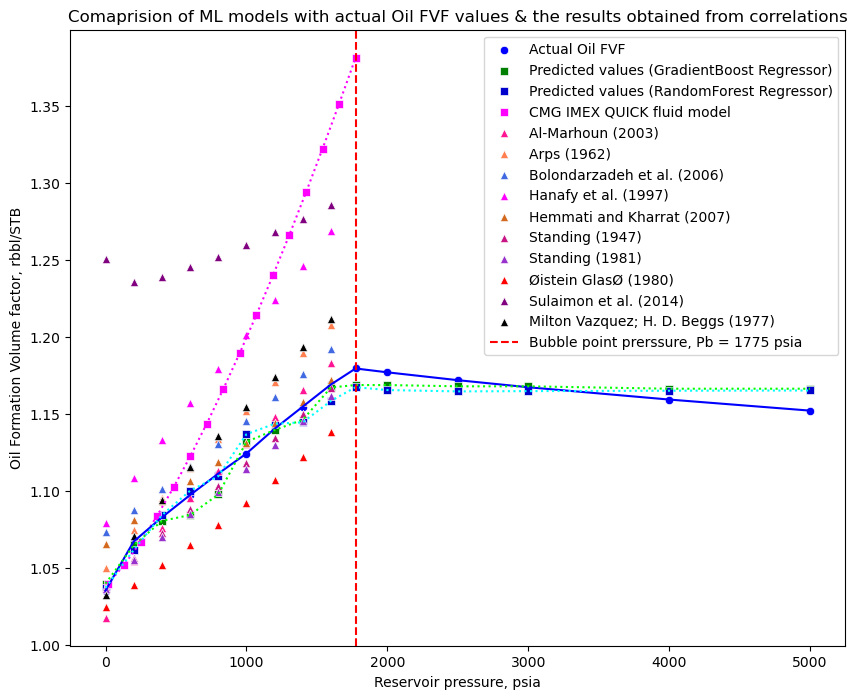

In [471]:
plt.figure(figsize = (10,8))

sns.scatterplot(x = df_test_data['P_psia'],y= df_test_data['Oil_FVF'], color = "blue" ,label ="Actual Oil FVF")
sns.scatterplot(x =df_test_data['P_psia'],y = y_pred4_unseen, color = 'green',label = "Predicted values (GradientBoost Regressor)", marker ="s") #gb
sns.scatterplot(x =df_test_data['P_psia'],y = y_pred2_unseen, color = 'mediumblue', label = "Predicted values (RandomForest Regressor)", marker = "s") #rf
sns.scatterplot(x = df_cmg['P_psi'],y= df_cmg['Bo'], color = "magenta", label = "CMG IMEX QUICK fluid model", marker = "s")

marker_corr = "^"
sns.scatterplot(x= df_test_data_for_corr['P_psia'],y= almah_2003, label = "Al-Marhoun (2003)",color = "deeppink", marker =marker_corr)
sns.scatterplot(x= df_test_data_for_corr['P_psia'],y= arps_1962, label = "Arps (1962)",color = "coral",marker =marker_corr)
sns.scatterplot(x= df_test_data_for_corr['P_psia'],y= bolo_2006,label = "Bolondarzadeh et al. (2006)", color = "royalblue",marker =marker_corr)
sns.scatterplot(x= df_test_data_for_corr['P_psia'],y= hana_1997, color = "magenta", label = "Hanafy et al. (1997)",marker =marker_corr)
sns.scatterplot(x= df_test_data_for_corr['P_psia'],y= hemma_2007, color = "chocolate", label = "Hemmati and Kharrat (2007)",marker =marker_corr) 
sns.scatterplot(x= df_test_data_for_corr['P_psia'],y= stand_1947, color =  "mediumvioletred", label = "Standing (1947)",marker =marker_corr) 
sns.scatterplot(x= df_test_data_for_corr['P_psia'],y= stand_1981, color =  "darkorchid", label = "Standing (1981)",marker =marker_corr) 
sns.scatterplot(x = df_test_data_for_corr['P_psia'],y= glaso_1980, label = "Øistein GlasØ (1980)",color = "red",marker =marker_corr)
sns.scatterplot(x= df_test_data_for_corr['P_psia'],y= Sulaimon_2014, color = "purple", label = "Sulaimon et al. (2014)",marker =marker_corr) 
sns.scatterplot(x= df_test_data_for_corr['P_psia'],y= vzq, color = "black", label = "Milton Vazquez; H. D. Beggs (1977)",marker =marker_corr) 

sns.lineplot(x = df_cmg['P_psi'],y= df_cmg['Bo'], color = "magenta", linestyle = ":")
sns.lineplot(x = df_test_data['P_psia'],y=df_test_data['Oil_FVF'], color = "blue")
sns.lineplot(x = df_test_data['P_psia'],y=y_pred4_unseen, color = 'lime' , linestyle = ":")
sns.lineplot(x =df_test_data['P_psia'],y = y_pred2_unseen, color = 'cyan', linestyle = ":")

# sns.lineplot(x= df_cmg['P_psi'],y=df_cmg['Bo'], color = 'magenta')
# sns.lineplot(x= df_test_data_for_corr['P_psia'],y=glaso_1980, color = 'red')
# sns.lineplot(x= df_test_data_for_corr['P_psia'],y= almah_2003,color = "deeppink")
# sns.lineplot(x= df_test_data_for_corr['P_psia'],y= arps_1962, color = "coral")
# sns.lineplot(x= df_test_data_for_corr['P_psia'],y= bolo_2006, color = "royalblue")
# sns.lineplot(x= df_test_data_for_corr['P_psia'],y= hana_1997, color = "teal")
# sns.lineplot(x= df_test_data_for_corr['P_psia'],y= hemma_2007, color = "chocolate")
# sns.lineplot(x= df_test_data_for_corr['P_psia'],y= stand_1947, color = "mediumvioletred") 
# sns.lineplot(x= df_test_data_for_corr['P_psia'],y= stand_1981, color =  "darkorchid") 
# sns.lineplot(x= df_test_data_for_corr['P_psia'],y= Sulaimon_2014, color = "purple") 
# sns.lineplot(x= df_test_data_for_corr['P_psia'],y= vzq, color = "black") 


plt.axvline(1775, linestyle = "--", color ="red", label = "Bubble point prerssure, Pb = 1775 psia")
plt.xlabel('Reservoir pressure, psia')
plt.ylabel('Oil Formation Volume factor, rbbl/STB')
plt.title('Comaprision of ML models with actual Oil FVF values & the results obtained from correlations')
plt.legend()
#plt.ylim(0)
plt.savefig('OIL FVF result with cmg.png', dpi = 1200,  bbox_inches='tight')

plt.show()

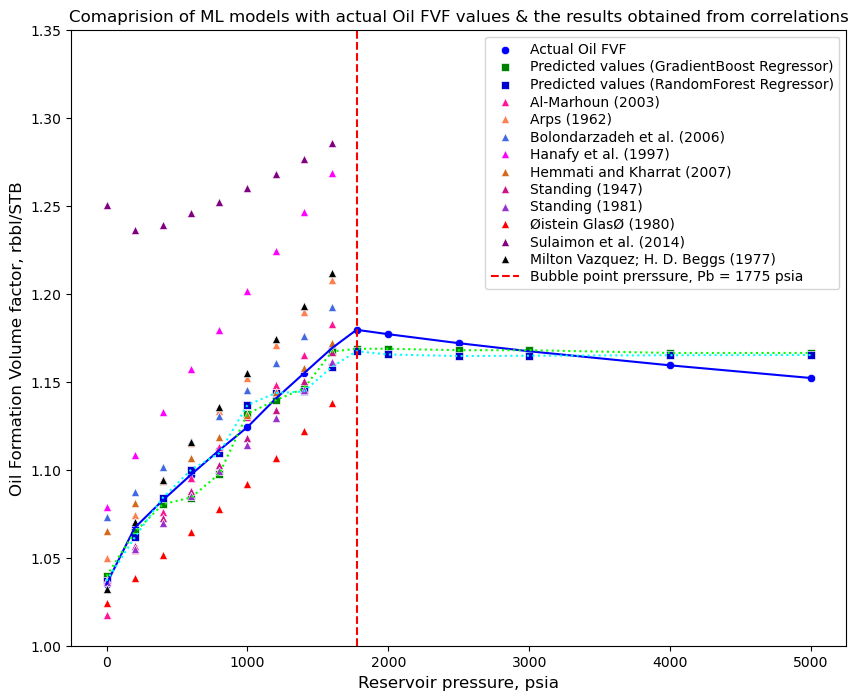

In [448]:
plt.figure(figsize = (10,8))

sns.scatterplot(x = df_test_data['P_psia'],y= df_test_data['Oil_FVF'],
                color = "blue" ,label ="Actual Oil FVF")
sns.scatterplot(x =df_test_data['P_psia'],y = y_pred4_unseen, 
                color = 'green',label = "Predicted values (GradientBoost Regressor)", marker ="s") #gb
sns.scatterplot(x =df_test_data['P_psia'],y = y_pred2_unseen, 
                color = 'mediumblue', label = "Predicted values (RandomForest Regressor)", marker = "s") #rf
#sns.scatterplot(x = df_cmg['P_psi'],y= df_cmg['Bo'], color = "magenta", label = "CMG IMEX QUICK fluid model", marker = "s")

marker_corr = "^"
sns.scatterplot(x= df_test_data_for_corr['P_psia'],y= almah_2003, label = "Al-Marhoun (2003)",
                color = "deeppink", marker =marker_corr)
sns.scatterplot(x= df_test_data_for_corr['P_psia'],y= arps_1962, label = "Arps (1962)",
                color = "coral",marker =marker_corr)
sns.scatterplot(x= df_test_data_for_corr['P_psia'],y= bolo_2006,label = "Bolondarzadeh et al. (2006)",
                color = "royalblue",marker =marker_corr)
sns.scatterplot(x= df_test_data_for_corr['P_psia'],y= hana_1997, 
                color = "magenta", label = "Hanafy et al. (1997)",marker =marker_corr)
sns.scatterplot(x= df_test_data_for_corr['P_psia'],y= hemma_2007, 
                color = "chocolate", label = "Hemmati and Kharrat (2007)",marker =marker_corr) 
sns.scatterplot(x= df_test_data_for_corr['P_psia'],y= stand_1947, 
                color =  "mediumvioletred", label = "Standing (1947)",marker =marker_corr) 
sns.scatterplot(x= df_test_data_for_corr['P_psia'],y= stand_1981,
                color =  "darkorchid", label = "Standing (1981)",marker =marker_corr) 
sns.scatterplot(x = df_test_data_for_corr['P_psia'],y= glaso_1980, label = "Øistein GlasØ (1980)",
                color = "red",marker =marker_corr)
sns.scatterplot(x= df_test_data_for_corr['P_psia'],y= Sulaimon_2014,
                color = "purple", label = "Sulaimon et al. (2014)",marker =marker_corr) 
sns.scatterplot(x= df_test_data_for_corr['P_psia'],y= vzq,
                color = "black", label = "Milton Vazquez; H. D. Beggs (1977)",marker =marker_corr) 

#sns.lineplot(x = df_cmg['P_psi'],y= df_cmg['Bo'], color = "black", linestyle = ":")
sns.lineplot(x = df_test_data['P_psia'],y=df_test_data['Oil_FVF'], color = "blue")
sns.lineplot(x = df_test_data['P_psia'],y=y_pred4_unseen, color = 'lime' , linestyle = ":")
sns.lineplot(x =df_test_data['P_psia'],y = y_pred2_unseen, color = 'cyan', linestyle = ":")

#sns.lineplot(x =df_test_data['P_psia'],y = y_pred5_unseen, color = 'red', linestyle = "--")
# sns.lineplot(x= df_cmg['P_psi'],y=df_cmg['Bo'], color = 'magenta')
# sns.lineplot(x= df_test_data_for_corr['P_psia'],y=glaso_1980, color = 'red')
# sns.lineplot(x= df_test_data_for_corr['P_psia'],y= almah_2003,color = "deeppink")
# sns.lineplot(x= df_test_data_for_corr['P_psia'],y= arps_1962, color = "coral")
# sns.lineplot(x= df_test_data_for_corr['P_psia'],y= bolo_2006, color = "royalblue")
# sns.lineplot(x= df_test_data_for_corr['P_psia'],y= hana_1997, color = "teal")
# sns.lineplot(x= df_test_data_for_corr['P_psia'],y= hemma_2007, color = "chocolate")
# sns.lineplot(x= df_test_data_for_corr['P_psia'],y= stand_1947, color = "mediumvioletred") 
# sns.lineplot(x= df_test_data_for_corr['P_psia'],y= stand_1981, color =  "darkorchid") 
# sns.lineplot(x= df_test_data_for_corr['P_psia'],y= Sulaimon_2014, color = "purple") 
# sns.lineplot(x= df_test_data_for_corr['P_psia'],y= vzq, color = "black") 


plt.axvline(1775, linestyle = "--", color ="red", label = "Bubble point prerssure, Pb = 1775 psia")
plt.xlabel('Reservoir pressure, psia', fontsize =12)
plt.ylabel('Oil Formation Volume factor, rbbl/STB', fontsize = 12)
plt.title('Comaprision of ML models with actual Oil FVF values & the results obtained from correlations')

plt.legend(loc = 0, mode= None, labelspacing = 0.25)
plt.ylim(1,1.35)

plt.savefig('Oil FVF model result.png', dpi = 1200,bbox_inches ='tight')
plt.show()